In [1]:
import pandas as pd
import os
import zipfile
import shutil
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go  # Core graph objects for creating visualizations
import plotly.express as px       # High-level interface for creating common chart types
from plotly.subplots import make_subplots  # Create subplots and layouts
from scipy.stats import f_oneway, kruskal
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# Set the maximum number of columns to display
pd.set_option('display.float_format', '{:.4f}'.format)
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## Reading in the Data

Delete the zip file if it exists.

In [3]:
zip_file_path = "cardiovascular-diseases-risk-prediction-dataset.zip"  # Specify the file path

if os.path.exists(zip_file_path):  # Check if the file exists
    os.remove(zip_file_path)  # Remove the file
    
    print(f"File '{zip_file_path}' has been successfully removed.")
else:
    print(f"File '{zip_file_path}' does not exist.")

File 'cardiovascular-diseases-risk-prediction-dataset.zip' does not exist.


Retrieve the zipped data set from kaggle and save it into the default directory.

In [4]:
os.environ['KAGGLE_USERNAME'] = 'reesemcdonald'  # Replace with your Kaggle username
os.environ['KAGGLE_KEY'] = '7796176eb7a5d98c8c63ffb78535a6ac'  # Replace with your Kaggle API key

!kaggle datasets download -d alphiree/cardiovascular-diseases-risk-prediction-dataset

Error processing line 3 of C:\Users\rsmcd\anaconda3\lib\site-packages\googleapis_common_protos-1.56.4-py3.10-nspkg.pth:

  Traceback (most recent call last):
    File "C:\Users\rsmcd\anaconda3\lib\site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 562, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored

  0%|          | 0.00/4.87M [00:00<?, ?B/s]
 21%|##        | 1.00M/4.87M [00:00<00:00, 5.29MB/s]
 62%|######1   | 3.00M/4.87M [00:00<00:00, 10.8MB/s]
100%|##########| 4.87M/4.87M [00:00<00:00, 15.5MB/s]


Delete the extracted subdirectory if it exists.

In [5]:
subdirectory_path = "cardiovascular-diseases-risk-prediction-dataset"  # Specify the subdirectory path

if os.path.exists(subdirectory_path):  # Check if the subdirectory exists
    shutil.rmtree(subdirectory_path)  # Remove the subdirectory and its contents
    print(f"Subdirectory '{subdirectory_path}' has been successfully deleted.")
else:
    print(f"Subdirectory '{subdirectory_path}' does not exist.")

Subdirectory 'cardiovascular-diseases-risk-prediction-dataset' does not exist.


Extract the zip file into a subdirectory.

In [6]:
zip_file_path = "cardiovascular-diseases-risk-prediction-dataset.zip"  # Update with the actual path to your ZIP file

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall("cardiovascular-diseases-risk-prediction-dataset")  # Update "destination_directory" with the desired directory path

# Perform further operations on the extracted files

# The ZIP file is automatically closed after exiting the `with` block

Create the file path necessary to write the data set to a data frame object.

In [7]:
folder_path = "cardiovascular-diseases-risk-prediction-dataset"  # Specify the folder path
file_name = "CVD_cleaned.csv"  # Specify the file name

file_path = os.path.join(folder_path, file_name)  # Combine the folder path and file name

# Read the CSV file into a pandas DataFrame
cdrpd = pd.read_csv(file_path)

# Remove symbols '%', '$', and ','
# wd23 = wd23.replace(['%', '\$', ','], '', regex=True)

# You can now use the 'wd23' DataFrame to work with the data from the CSV file

Clean up and save space.

In [8]:
zip_file_path = "cardiovascular-diseases-risk-prediction-dataset.zip"  # Specify the file path

if os.path.exists(zip_file_path):  # Check if the file exists
    os.remove(zip_file_path)  # Remove the file
    print(f"File '{zip_file_path}' has been successfully removed.")
else:
    print(f"File '{zip_file_path}' does not exist.")
    
subdirectory_path = "cardiovascular-diseases-risk-prediction-dataset"  # Specify the subdirectory path

if os.path.exists(subdirectory_path):  # Check if the subdirectory exists
    shutil.rmtree(subdirectory_path)  # Remove the subdirectory and its contents
    print(f"Subdirectory '{subdirectory_path}' has been successfully deleted.")
else:
    print(f"Subdirectory '{subdirectory_path}' does not exist.")

File 'cardiovascular-diseases-risk-prediction-dataset.zip' has been successfully removed.
Subdirectory 'cardiovascular-diseases-risk-prediction-dataset' has been successfully deleted.


Taking a look around.

In [9]:
print(file_path)
cdrpd

cardiovascular-diseases-risk-prediction-dataset\CVD_cleaned.csv


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0000,32.6600,14.5400,Yes,0.0000,30.0000,16.0000,12.0000
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0000,77.1100,28.2900,No,0.0000,30.0000,0.0000,4.0000
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0000,88.4500,33.4700,No,4.0000,12.0000,3.0000,16.0000
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0000,93.4400,28.7300,No,0.0000,30.0000,30.0000,8.0000
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0000,88.4500,24.3700,Yes,0.0000,8.0000,4.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0000,81.6500,29.0500,No,4.0000,30.0000,8.0000,0.0000
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0000,69.8500,21.4800,No,8.0000,15.0000,60.0000,4.0000
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0000,61.2300,24.6900,Yes,4.0000,40.0000,8.0000,4.0000
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0000,79.3800,23.7300,No,3.0000,30.0000,12.0000,0.0000


## Inspecting, Cleaning, Adding Features to the Data

In [10]:
column_info = cdrpd.dtypes.reset_index()
column_info.columns = ['Column_Name', 'Data_Type']
column_info = column_info.sort_values(by='Data_Type').set_index('Column_Name')
column_info

,Data_Type
Column_Name,
FriedPotato_Consumption,float64
Fruit_Consumption,float64
Alcohol_Consumption,float64
BMI,float64
Weight_(kg),float64
Height_(cm),float64
Green_Vegetables_Consumption,float64
Smoking_History,object
Age_Category,object


In [11]:
# Check which columns have all unique values
columns_with_unique_values = cdrpd.columns[cdrpd.nunique() == len(cdrpd)]

# Print the columns with all unique values
print(columns_with_unique_values)

Index([], dtype='object')


Creating 'row_number' for possible use as a key for the SQL practice part of this project.

In [12]:
cdrpd['row_number'] = range(1, len(cdrpd) + 1)
cdrpd['row_number']

0              1
1              2
2              3
3              4
4              5
           ...  
308849    308850
308850    308851
308851    308852
308852    308853
308853    308854
Name: row_number, Length: 308854, dtype: int64

In [13]:
index_mapping = {
    'FriedPotato_Consumption': 'Fried_Potato_Consumption',
}
cdrpd = cdrpd.rename(columns=index_mapping)
cdrpd = cdrpd.applymap(lambda x: x.strip() if isinstance(x, str) else x)

Convert column names to lowercase and replace whitespace, hyphens, parentheses with underscores

In [14]:
cdrpd.rename(columns=lambda x: x.lower().replace(' ', '_').replace('-', '_').replace('(', '').replace(')', ''), 
            inplace=True)

cdrpd.columns

Index(['general_health', 'checkup', 'exercise', 'heart_disease', 'skin_cancer',
       'other_cancer', 'depression', 'diabetes', 'arthritis', 'sex',
       'age_category', 'height_cm', 'weight_kg', 'bmi', 'smoking_history',
       'alcohol_consumption', 'fruit_consumption',
       'green_vegetables_consumption', 'fried_potato_consumption',
       'row_number'],
      dtype='object')

In [15]:
mapping = {
    'Poor': '1 Poor',
    'Fair': '2 Fair',
    'Good': '3 Good',
    'Very Good': '4 Very Good',
    'Excellent': '5 Excellent'
}

cdrpd['general_health'] = cdrpd['general_health'].replace(mapping)

In [16]:
cdrpd = cdrpd.sort_values(by='general_health')

This cell converts metric columns to imperial and stores them in new columns.

In [18]:
cdrpd['weight_lbs'] = cdrpd['weight_kg']*2.20462
cdrpd['height_feet'] = (cdrpd['height_cm']*0.393701)/12
cdrpd[['weight_lbs', 'height_feet']]

,weight_lbs,height_feet
0,72.0029,4.9213
263218,161.9955,5.7415
69169,214.9945,5.8399
263245,230.0080,5.5118
69130,150.0023,5.5118
...,...,...
101068,184.9897,6.0039
101069,169.9982,5.3478
101075,161.0034,6.1680
242420,138.0092,5.5118


In [19]:
columns_to_drop = ['height_cm', 'weight_kg']

cdrpd.drop(columns=columns_to_drop, inplace=True)

Counting the number of na values in each column

In [20]:
nan_counts = cdrpd.isna().sum()
print(nan_counts)

general_health                  0
checkup                         0
exercise                        0
heart_disease                   0
skin_cancer                     0
other_cancer                    0
depression                      0
diabetes                        0
arthritis                       0
sex                             0
age_category                    0
bmi                             0
smoking_history                 0
alcohol_consumption             0
fruit_consumption               0
green_vegetables_consumption    0
fried_potato_consumption        0
row_number                      0
weight_lbs                      0
height_feet                     0
dtype: int64


Get lists of string columns and numerical columns

In [21]:
string_columns = cdrpd.select_dtypes(include='object').columns.tolist()
print(f'There are {len(string_columns)} string variables in the data set')
print(string_columns)
print()
numerical_columns = cdrpd.select_dtypes(include='float').columns.tolist()
print(f'There are {len(numerical_columns)} numerical variables in the data set')
print(numerical_columns)

There are 12 string variables in the data set
['general_health', 'checkup', 'exercise', 'heart_disease', 'skin_cancer', 'other_cancer', 'depression', 'diabetes', 'arthritis', 'sex', 'age_category', 'smoking_history']

There are 7 numerical variables in the data set
['bmi', 'alcohol_consumption', 'fruit_consumption', 'green_vegetables_consumption', 'fried_potato_consumption', 'weight_lbs', 'height_feet']


## Visualizing the Data

In [22]:
def categorical_bars(data, column, font_size):
    
    # Update the default font size
    plt.rcParams.update({'font.size': font_size})
    
    plt.figure(figsize=(10, 6))

    # Get the value counts for the specified column
    value_counts = data[column].value_counts()

    # Filter out categories with only one occurrence
    value_counts = value_counts[value_counts > 1]
    
    ax = value_counts.plot(kind='bar', edgecolor='none')  # Remove the black line border

    value_counts.plot(kind='bar')
    plt.title(f'Distribution of {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Frequency')
    
    # Add data labels (annotations) above each bar
    for index, value in enumerate(value_counts):
        plt.text(index, value + 1, str(value), ha='center', va='bottom')

    plt.show()

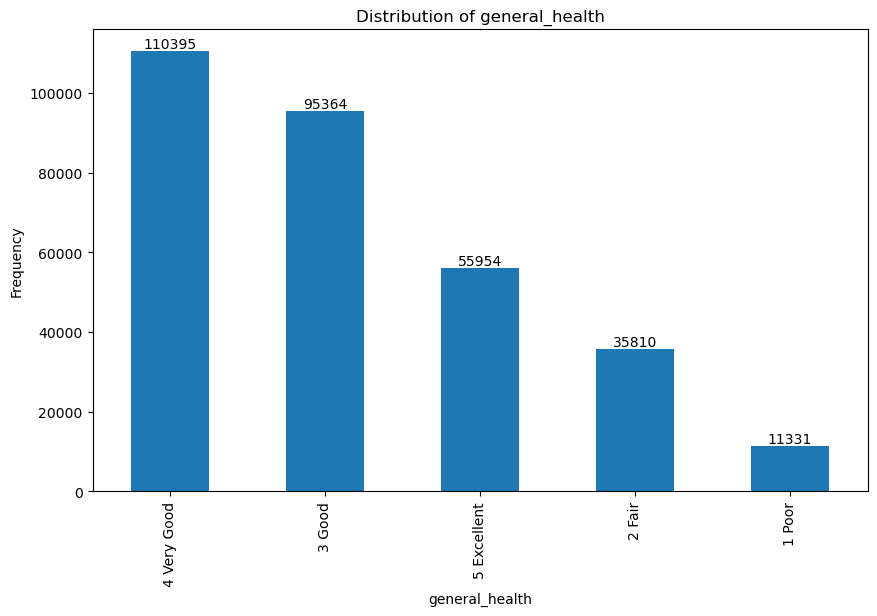

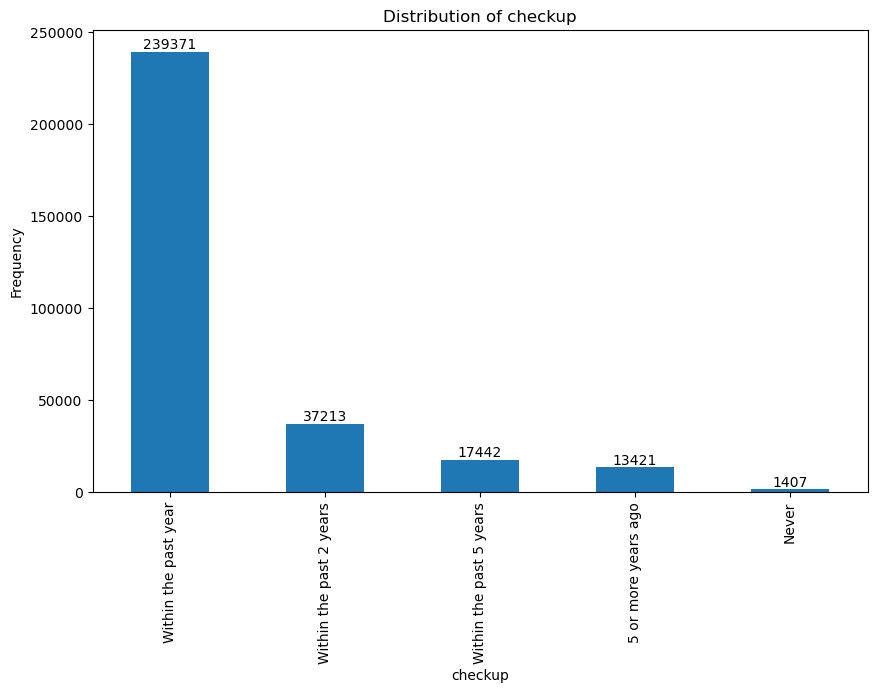

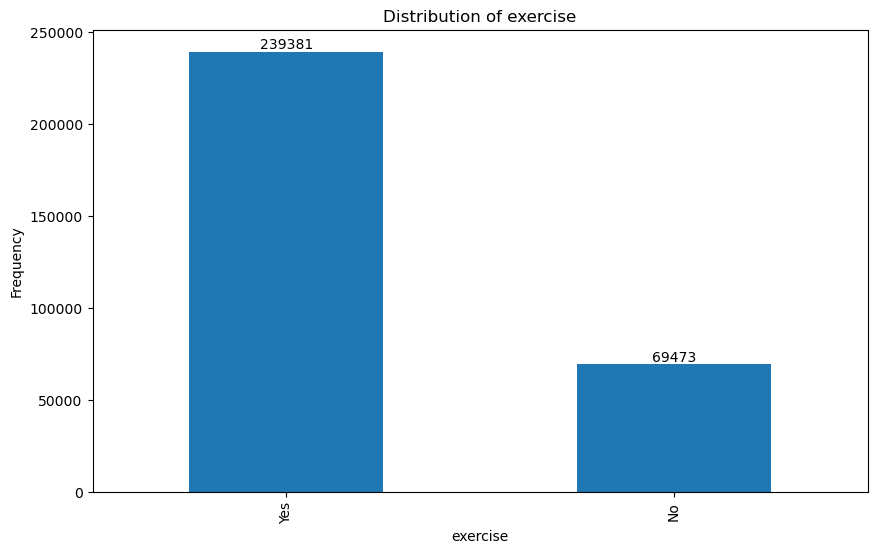

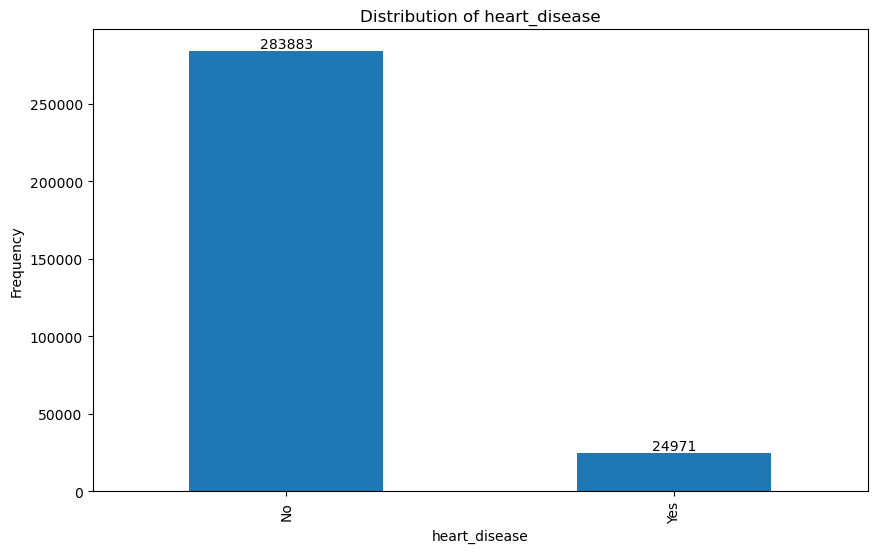

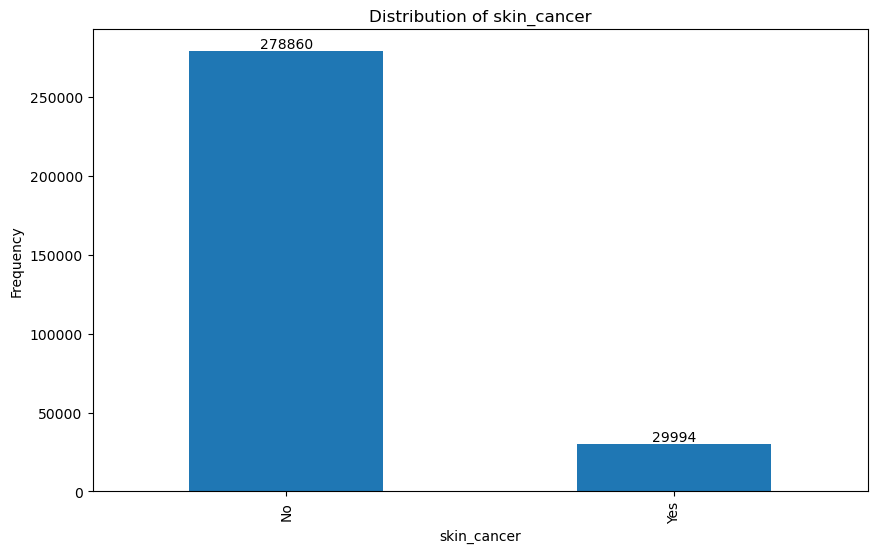

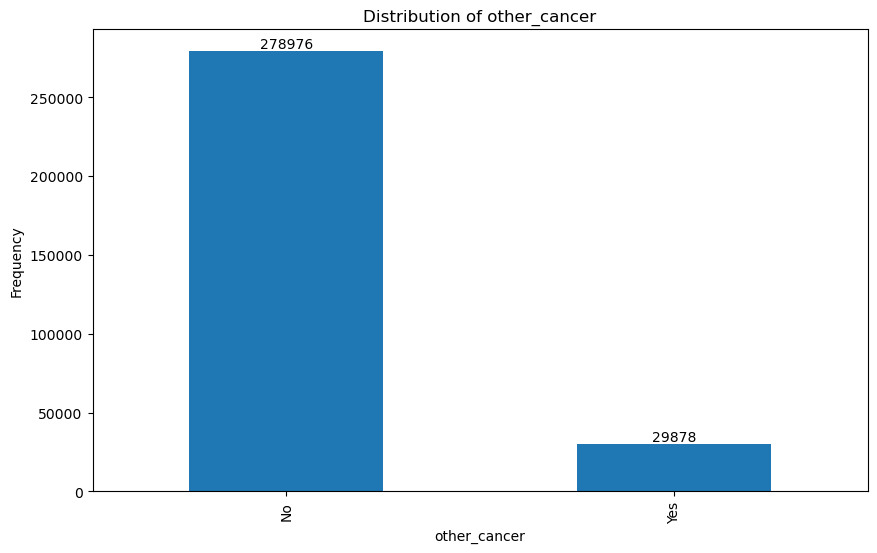

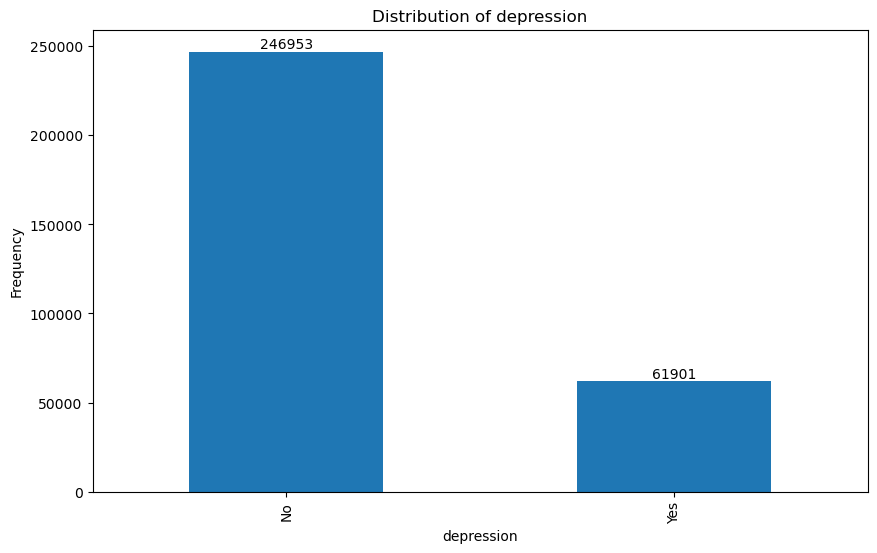

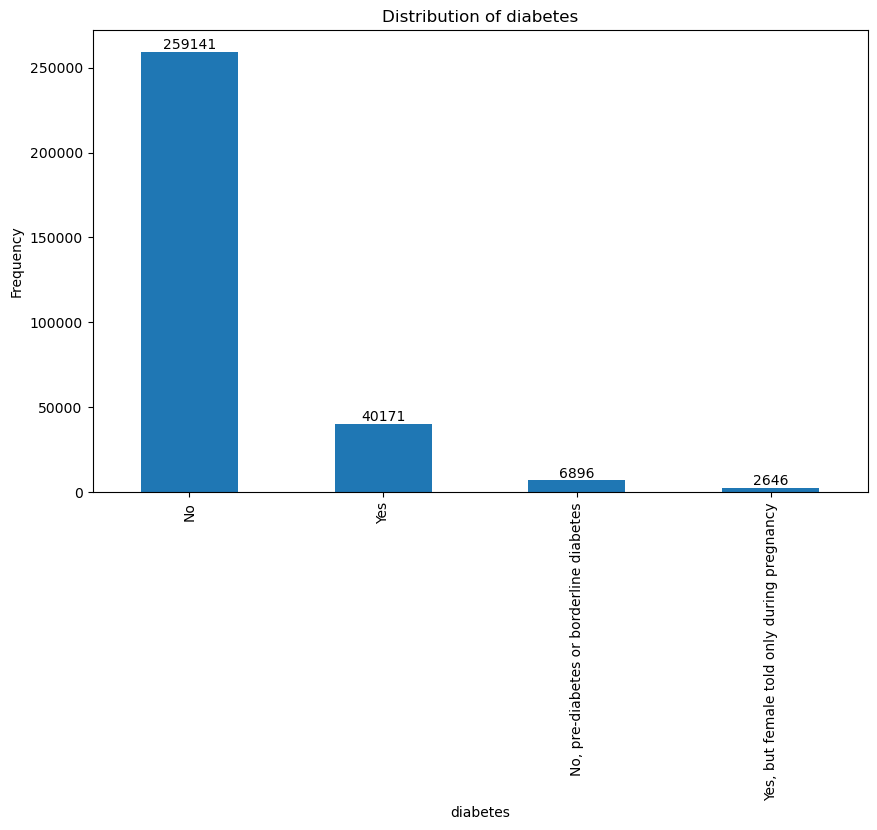

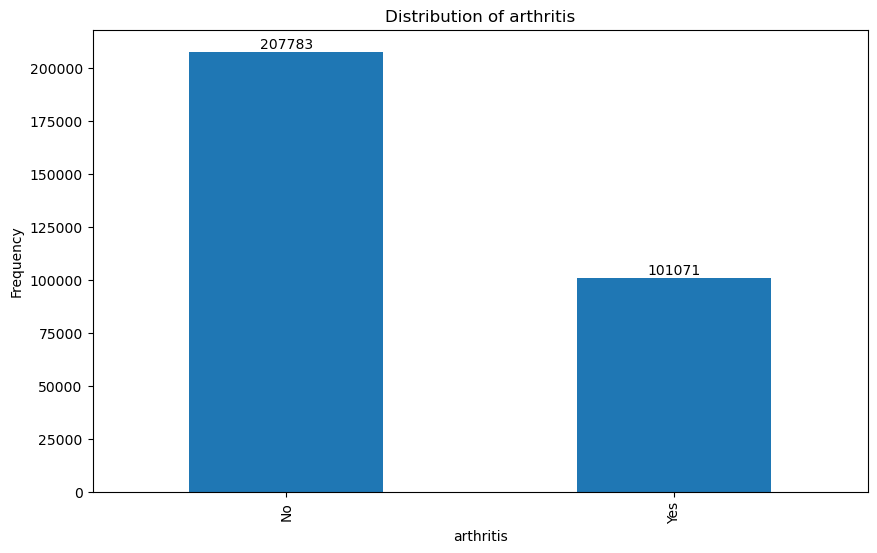

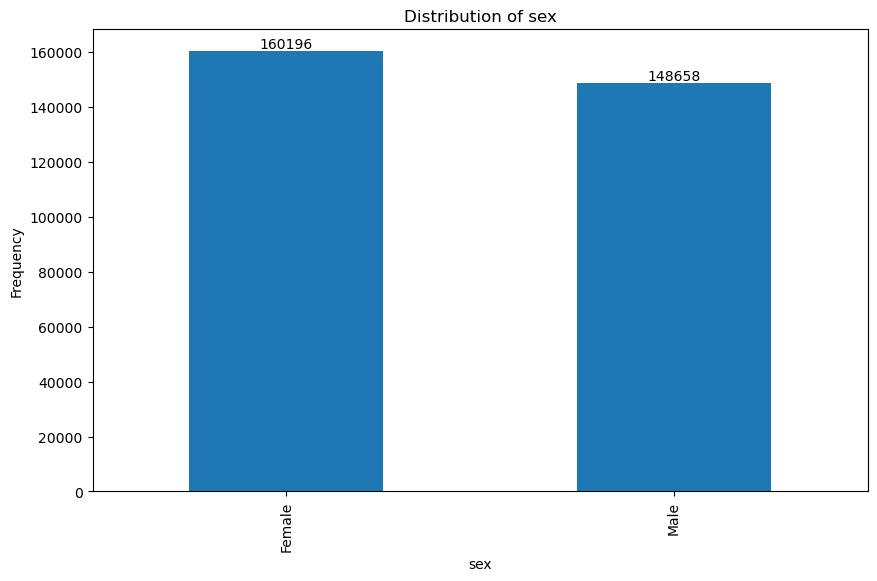

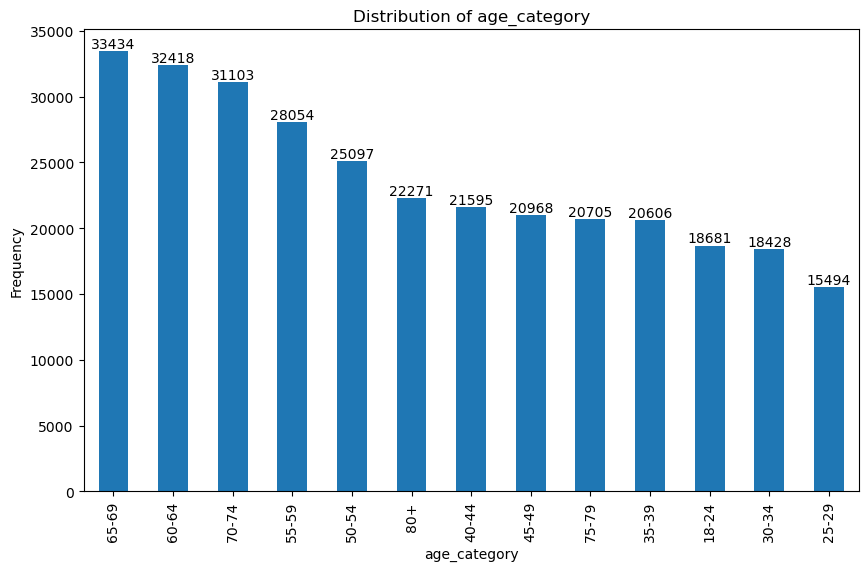

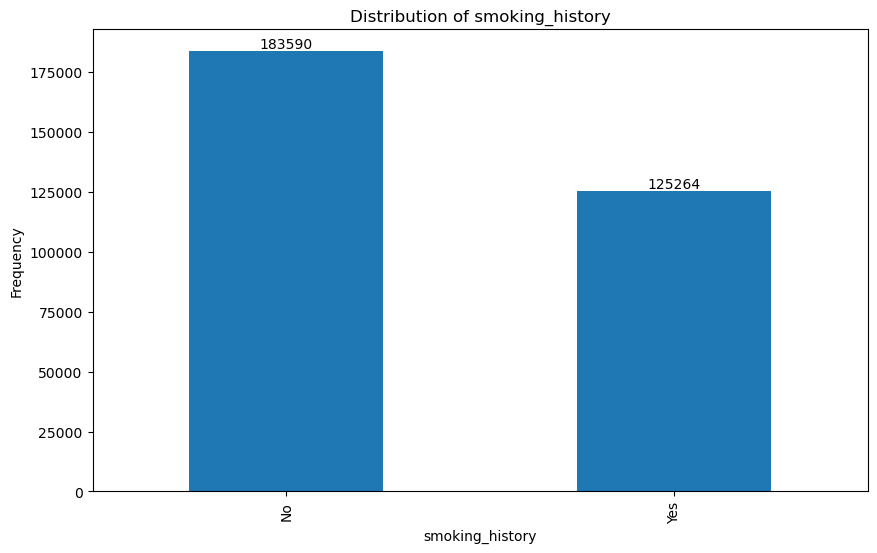

In [23]:
for string_column in string_columns:
    categorical_bars(cdrpd, string_column, 10)

In [24]:
# Descriptive Stats, Histograms

def numerical_description_and_histogram(numerical_col, data, num_bins, width, height):
    plt.rcParams.update({'font.size': 14})
    
    # Column name for which you want to create the histogram
    numerical_column = numerical_col
    
    plt.figure(figsize=(width, height))

    # Build the histogram
    plt.hist(data[numerical_column], bins=num_bins, edgecolor='black')  # Adjust the number of bins as needed

    # Customize the plot (optional)
    plt.title('Histogram of ' + numerical_column)
    plt.xlabel(numerical_column)
    plt.ylabel('Frequency')

    # Get descriptive statistics
    column_stats = data[numerical_column].describe()

    print("Descriptive Statistics for", numerical_column, "column:")
    print(column_stats)
    
    # Get the data from the column as a NumPy array
    column_data = data[numerical_column].values

    # Calculate kurtosis and skewness
    kurt = kurtosis(column_data, nan_policy='omit')  # Handle NaN values with 'omit'
    skw = skew(column_data, nan_policy='omit')  # Handle NaN values with 'omit'

    print("Kurtosis of", numerical_column, "column:", kurt)
    print("Skewness of", numerical_column, "column:", skw)
    
    # Show the plot
    plt.show()

Descriptive Statistics for bmi column:
count   308854.0000
mean        28.6262
std          6.5223
min         12.0200
25%         24.2100
50%         27.4400
75%         31.8500
max         99.3300
Name: bmi, dtype: float64
Kurtosis of bmi column: 4.240969090063066
Skewness of bmi column: 1.3766125684904729


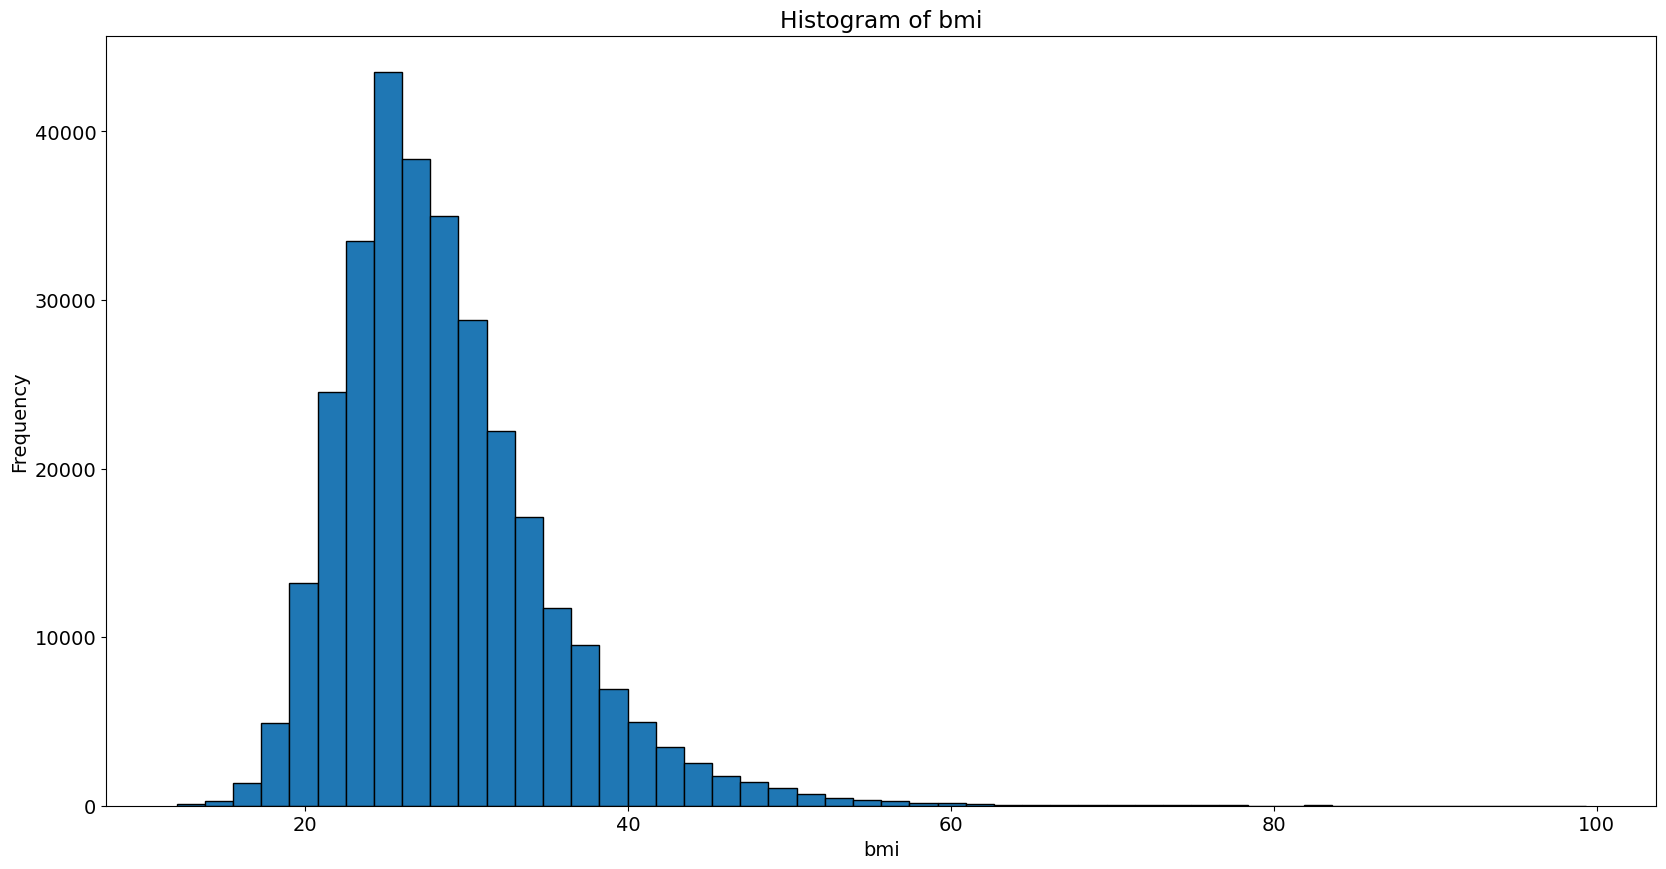

Descriptive Statistics for alcohol_consumption column:
count   308854.0000
mean         5.0964
std          8.1998
min          0.0000
25%          0.0000
50%          1.0000
75%          6.0000
max         30.0000
Name: alcohol_consumption, dtype: float64
Kurtosis of alcohol_consumption column: 2.5402003049310915
Skewness of alcohol_consumption column: 1.8856130421485662


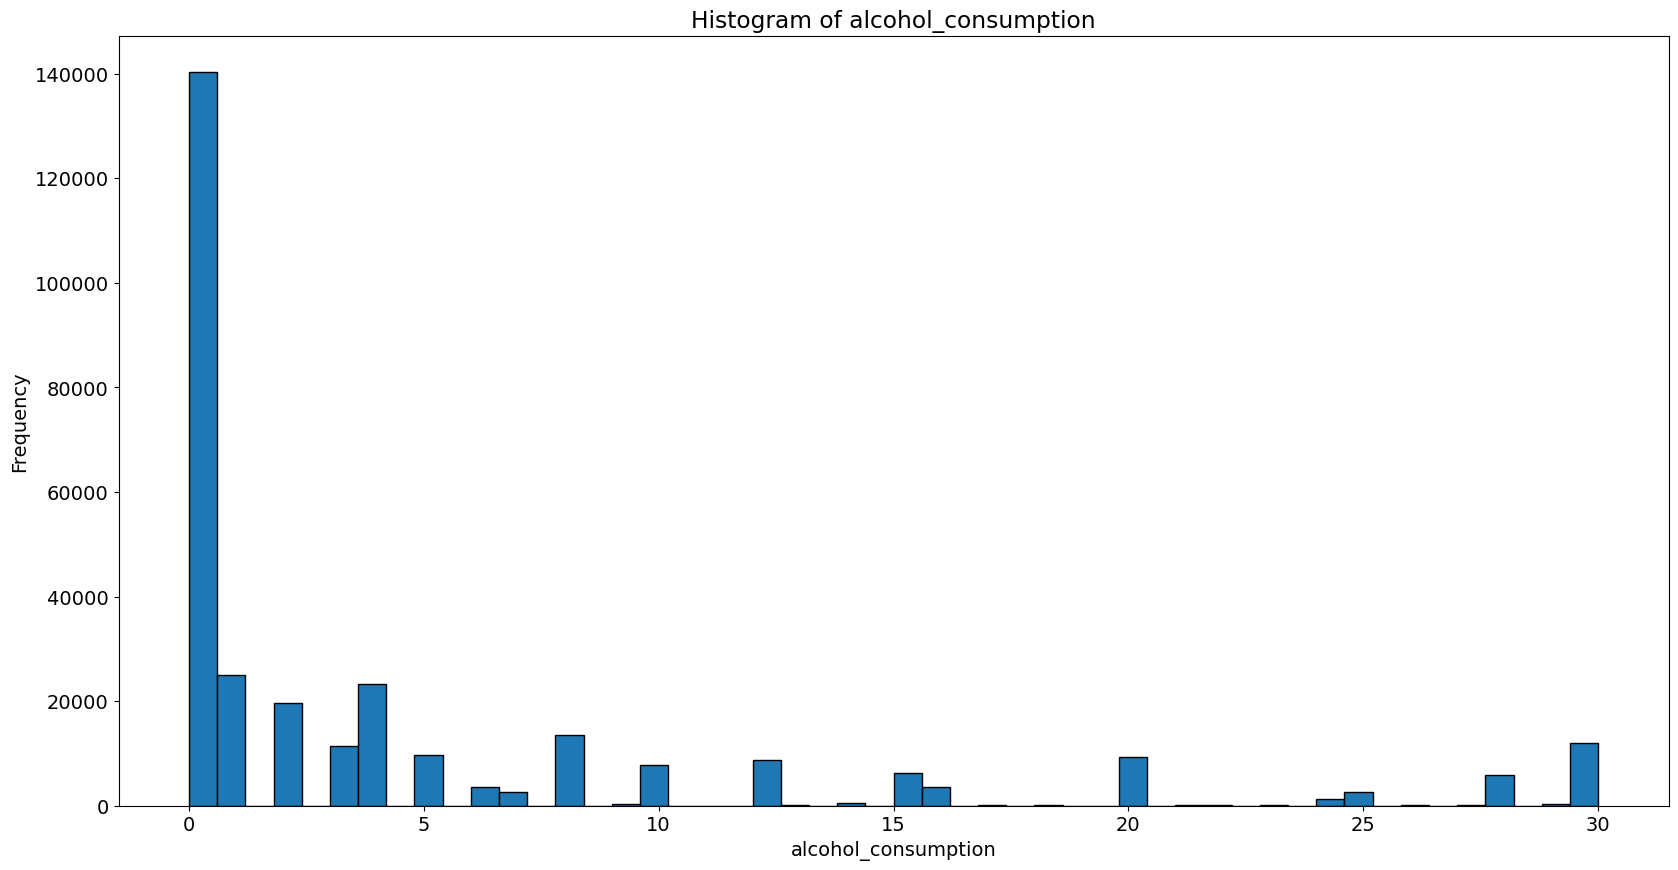

Descriptive Statistics for fruit_consumption column:
count   308854.0000
mean        29.8352
std         24.8757
min          0.0000
25%         12.0000
50%         30.0000
75%         30.0000
max        120.0000
Name: fruit_consumption, dtype: float64
Kurtosis of fruit_consumption column: 1.253748047271647
Skewness of fruit_consumption column: 1.2484220748669932


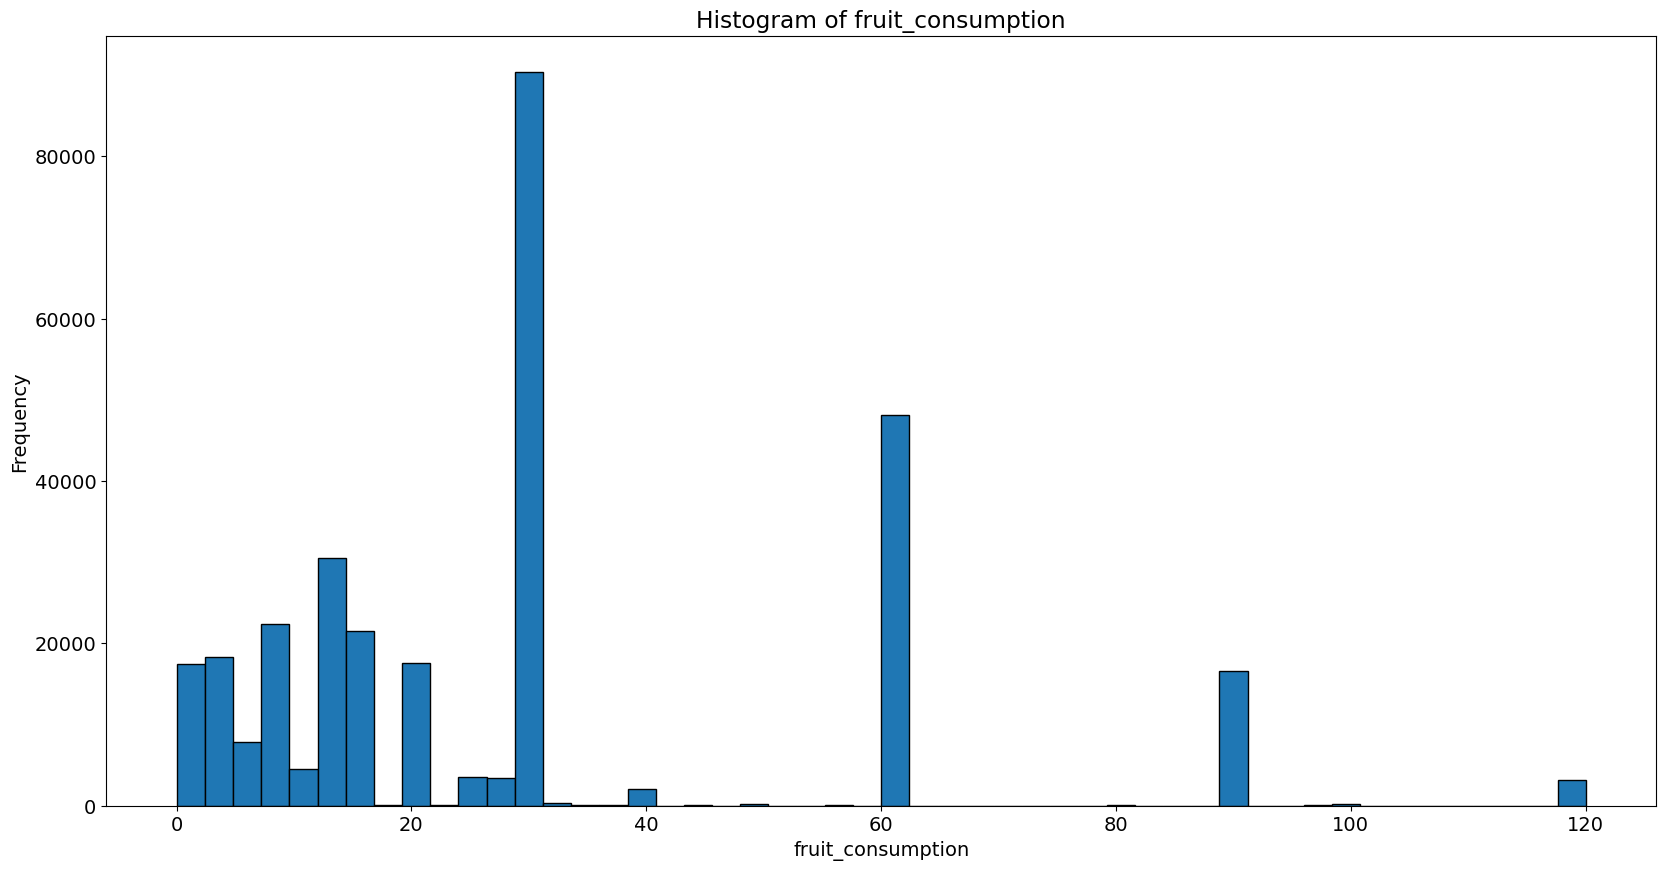

Descriptive Statistics for green_vegetables_consumption column:
count   308854.0000
mean        15.1104
std         14.9262
min          0.0000
25%          4.0000
50%         12.0000
75%         20.0000
max        128.0000
Name: green_vegetables_consumption, dtype: float64
Kurtosis of green_vegetables_consumption column: 9.443913716270298
Skewness of green_vegetables_consumption column: 2.4155959339274826


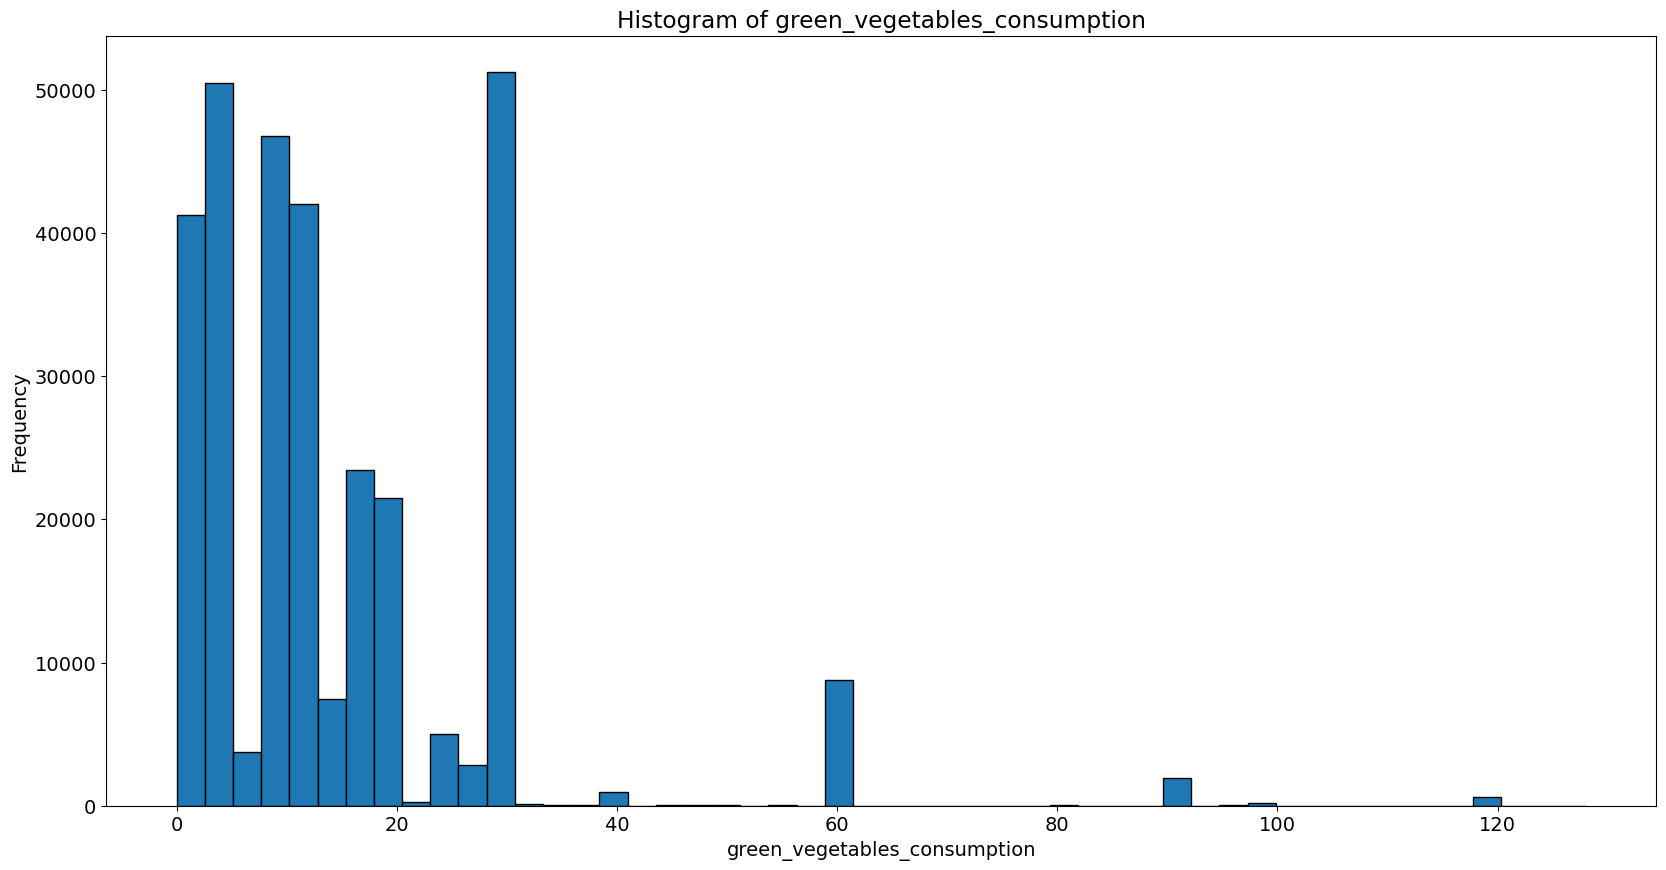

Descriptive Statistics for fried_potato_consumption column:
count   308854.0000
mean         6.2966
std          8.5830
min          0.0000
25%          2.0000
50%          4.0000
75%          8.0000
max        128.0000
Name: fried_potato_consumption, dtype: float64
Kurtosis of fried_potato_consumption column: 42.23021121005561
Skewness of fried_potato_consumption column: 4.9123257144132175


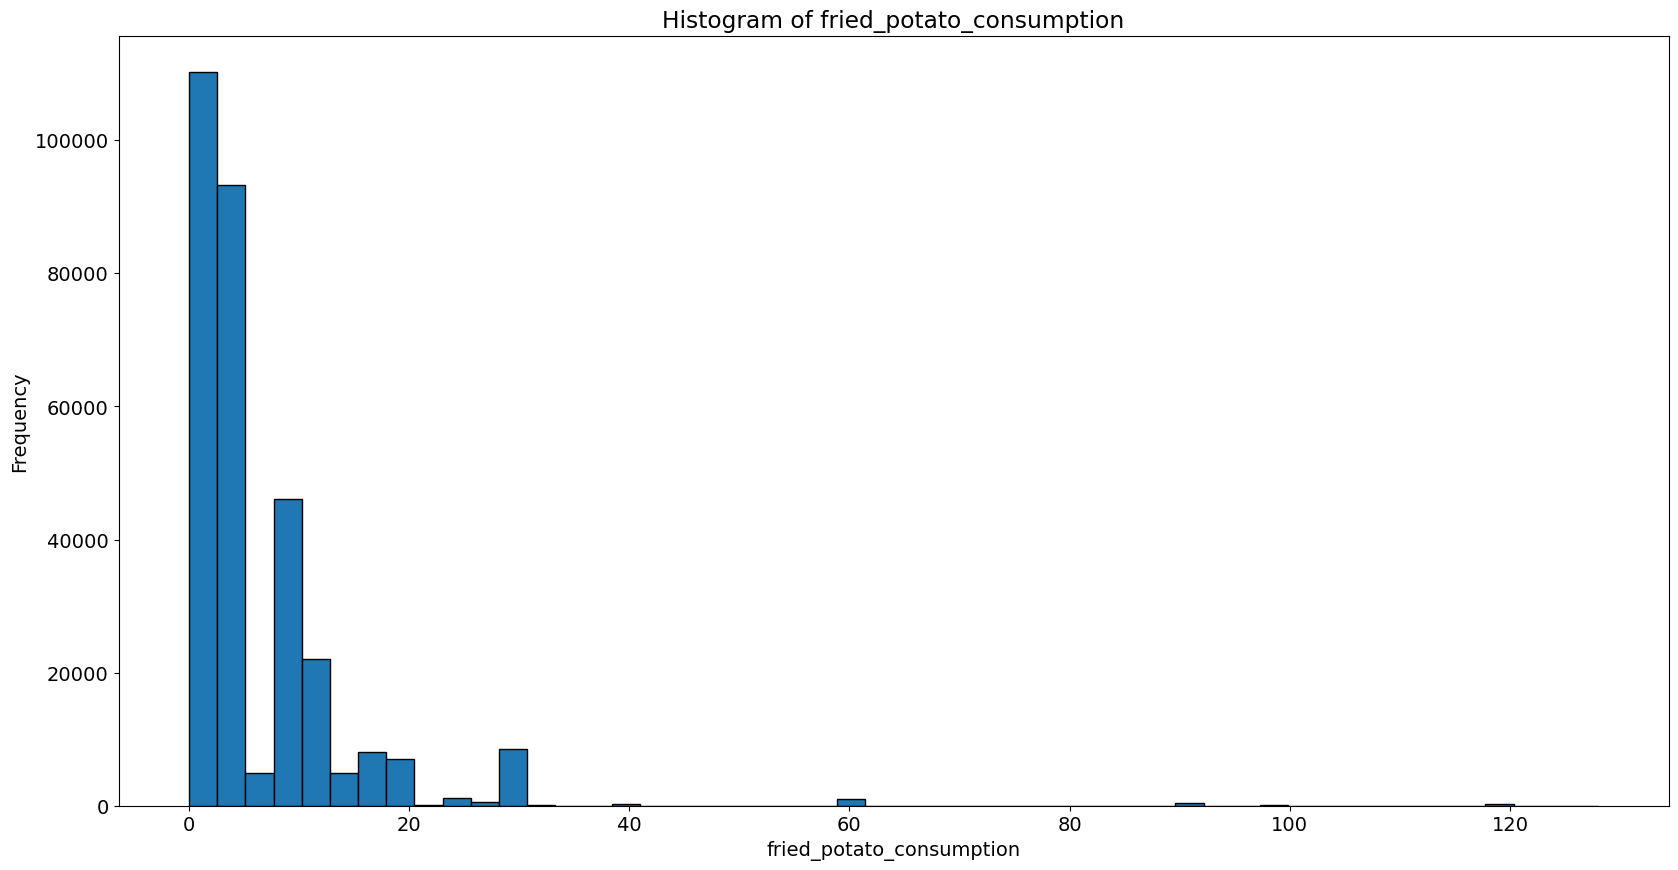

Descriptive Statistics for weight_lbs column:
count   308854.0000
mean       184.2812
std         47.0537
min         55.0053
25%        150.0023
50%        180.0072
75%        209.9901
max        645.9978
Name: weight_lbs, dtype: float64
Kurtosis of weight_lbs column: 2.573664312310113
Skewness of weight_lbs column: 1.0581985546498374


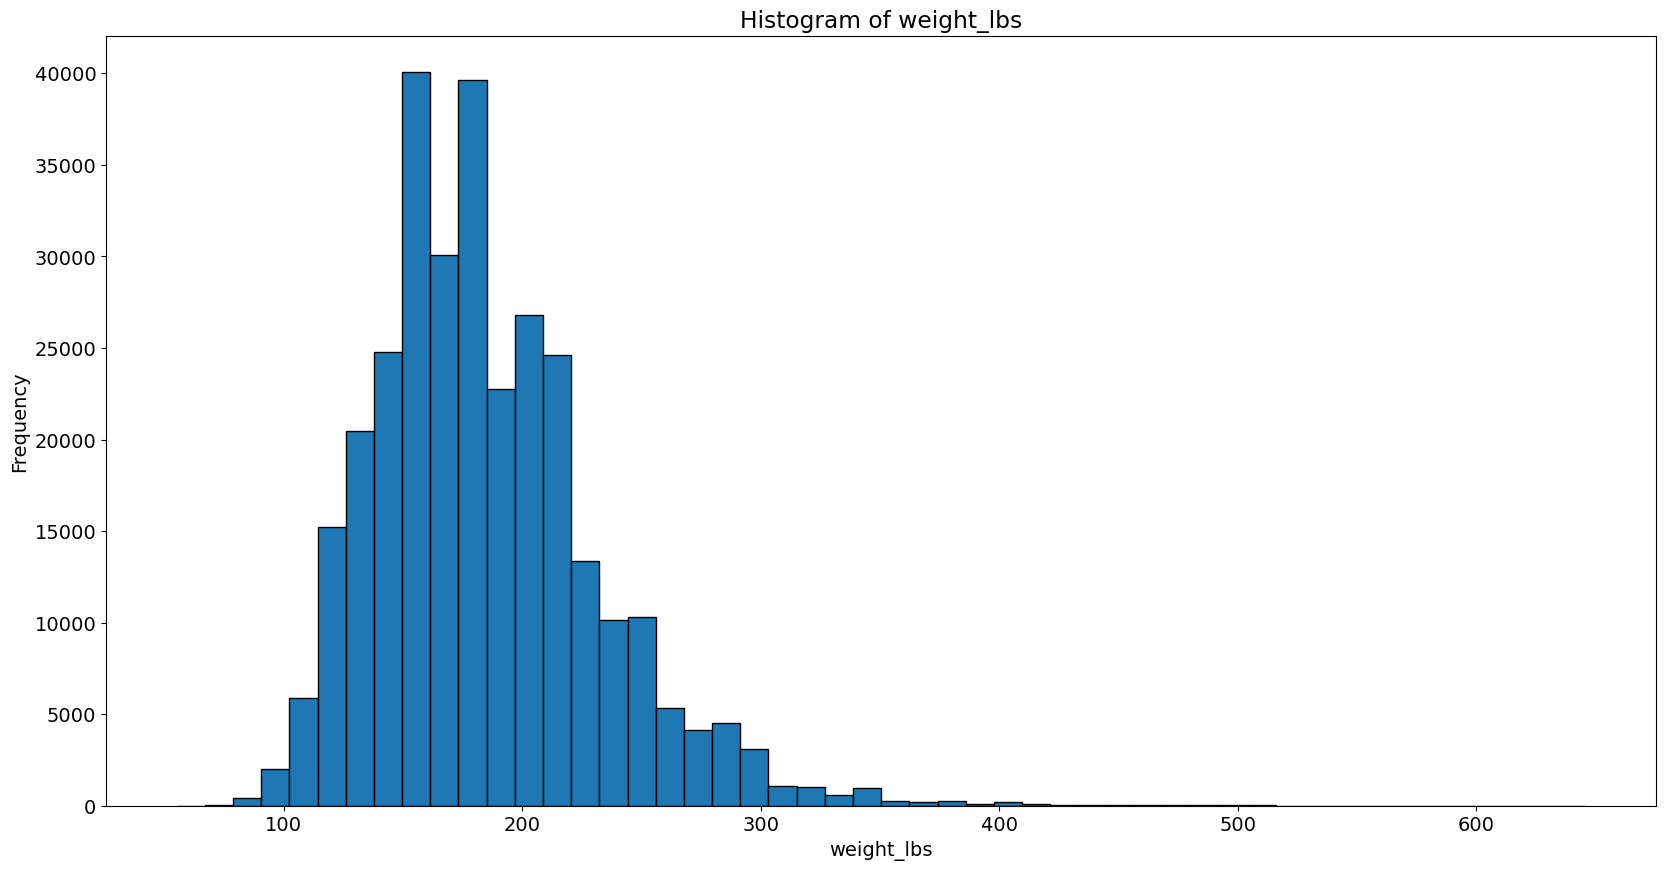

Descriptive Statistics for height_feet column:
count   308854.0000
mean         5.5976
std          0.3497
min          2.9856
25%          5.3478
50%          5.5774
75%          5.8399
max          7.9068
Name: height_feet, dtype: float64
Kurtosis of height_feet column: 0.0057462295563990295
Skewness of height_feet column: 0.015311122479294975


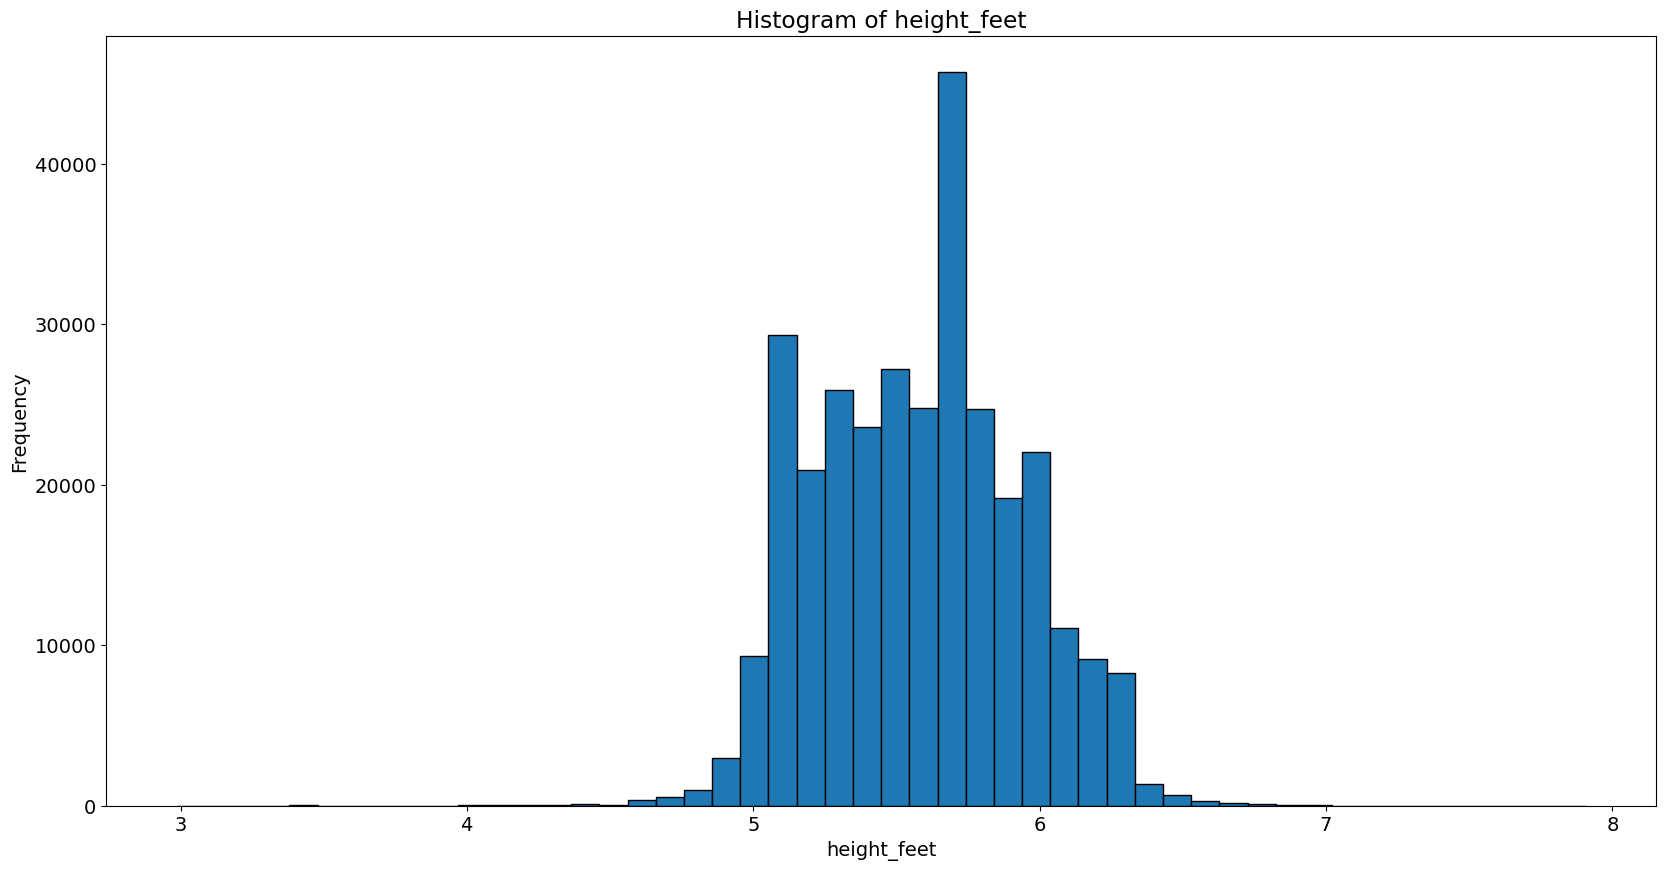

In [25]:
for numerical_column in numerical_columns:
    numerical_description_and_histogram(numerical_column, cdrpd, 50, 20, 10)

In [26]:
correlation_matrix = cdrpd[numerical_columns].corr()
correlation_matrix

,bmi,alcohol_consumption,fruit_consumption,green_vegetables_consumption,fried_potato_consumption,weight_lbs,height_feet
bmi,1.0000,-0.1087,-0.0766,-0.0706,0.0484,0.8597,-0.0274
alcohol_consumption,-0.1087,1.0000,-0.0126,0.0601,0.0205,-0.0324,0.1288
fruit_consumption,-0.0766,-0.0126,1.0000,0.2704,-0.0603,-0.0906,-0.0459
green_vegetables_consumption,-0.0706,0.0601,0.2704,1.0000,0.0032,-0.0759,-0.0301
fried_potato_consumption,0.0484,0.0205,-0.0603,0.0032,1.0000,0.0964,0.1088
weight_lbs,0.8597,-0.0324,-0.0906,-0.0759,0.0964,1.0000,0.4722
height_feet,-0.0274,0.1288,-0.0459,-0.0301,0.1088,0.4722,1.0000


In [27]:
def correlation_heatmap(cor_matrix):
    # Create a heatmap of the correlation matrix
    plt.figure(figsize=(28, 21))
    heatmap = sns.heatmap(cor_matrix, annot=True, cmap="coolwarm", square=True, vmin=-1, vmax=1)

    # Increase font size of axes labels
    heatmap.set_xlabel(heatmap.get_xlabel(), fontsize=40)
    heatmap.set_ylabel(heatmap.get_ylabel(), fontsize=40)

    # Increase font size of axes labels
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    plt.title("Correlation Matrix Heatmap")
    plt.show()

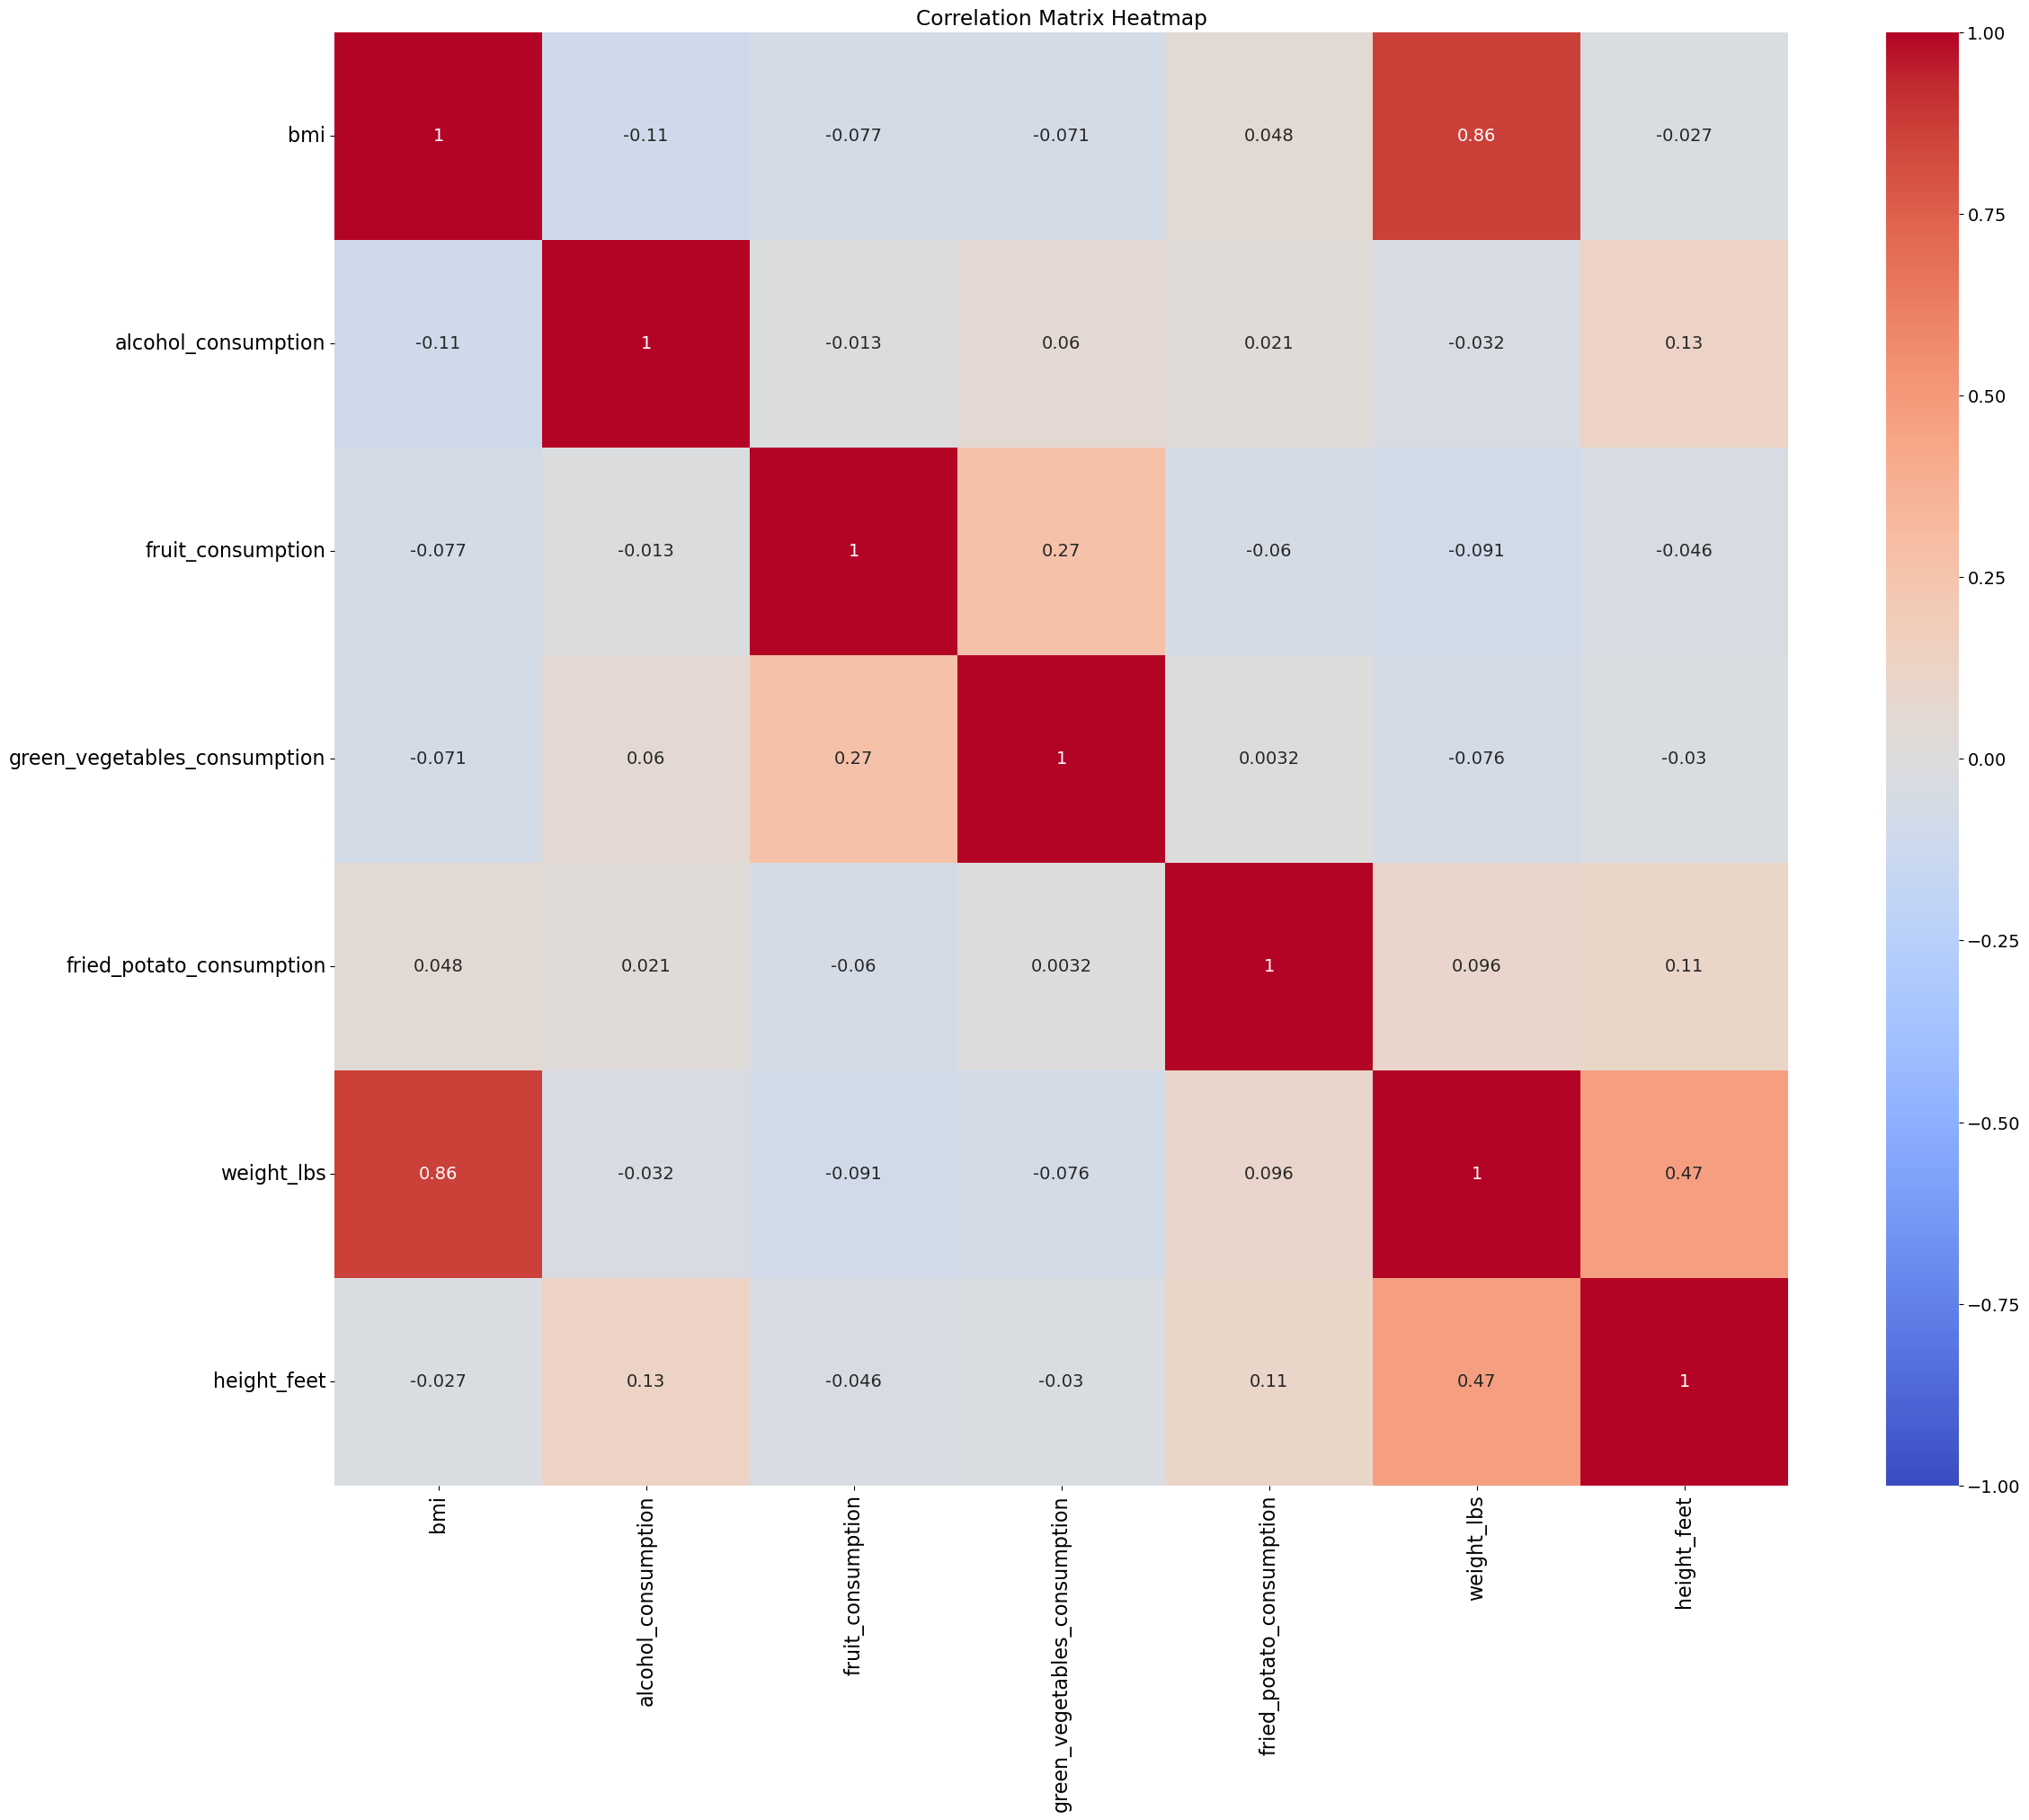

In [28]:
correlation_heatmap(correlation_matrix)

In [29]:
column1 = 'general_health'

In [43]:
def box_plot(col1, col2):
    
    print(f'ANOVA and Tukeys HSD of {col2} by {col1}')
    grouped_data = []  # List to hold data for each group

    # Assuming col1 is the categorical column and col2 is the numerical column
    for group in cdrpd[col1].unique():
        group_data = cdrpd[cdrpd[col1] == group][col2]
        grouped_data.append(group_data)

    # ANOVA test
    anova_result = f_oneway(*grouped_data)
    print("ANOVA p-value:", anova_result.pvalue)

    # Kruskal-Wallis test
    kruskal_result = kruskal(*grouped_data)
    print("Kruskal-Wallis p-value:", kruskal_result.pvalue)

    data = cdrpd[[col1, col2]]

    # Perform Tukey's test
    tukey_result = pairwise_tukeyhsd(data[col2], data[col1])

    # Print the Tukey's test summary
    print(tukey_result.summary())
    
    plt.figure(figsize=(18, 12))
    plt.boxplot([cdrpd[cdrpd[col1] == cat][col2] for cat in cdrpd[col1].unique()])
    plt.xticks(range(1, len(cdrpd[col1].unique()) + 1), cdrpd[col1].unique())
    plt.xlabel(f'{col1}')
    plt.ylabel(f'{col2}')
    plt.title(f'Box Plot of {col2} by {col1}')
    plt.show()

ANOVA and Tukeys HSD of bmi by general_health
ANOVA p-value: 0.0
Kruskal-Wallis p-value: 0.0
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
     1 Poor      2 Fair   0.2224 0.0095  0.0369  0.4079   True
     1 Poor      3 Good  -1.0816    0.0 -1.2526 -0.9106   True
     1 Poor 4 Very Good  -3.0792    0.0  -3.249 -2.9095   True
     1 Poor 5 Excellent  -4.8034    0.0 -4.9807 -4.6262   True
     2 Fair      3 Good   -1.304    0.0 -1.4106 -1.1973   True
     2 Fair 4 Very Good  -3.3016    0.0 -3.4063 -3.1969   True
     2 Fair 5 Excellent  -5.0258    0.0 -5.1423 -4.9093   True
     3 Good 4 Very Good  -1.9976    0.0 -2.0737 -1.9215   True
     3 Good 5 Excellent  -3.7218    0.0 -3.8135 -3.6302   True
4 Very Good 5 Excellent  -1.7242    0.0 -1.8135 -1.6349   True
--------------------------------------------------------------


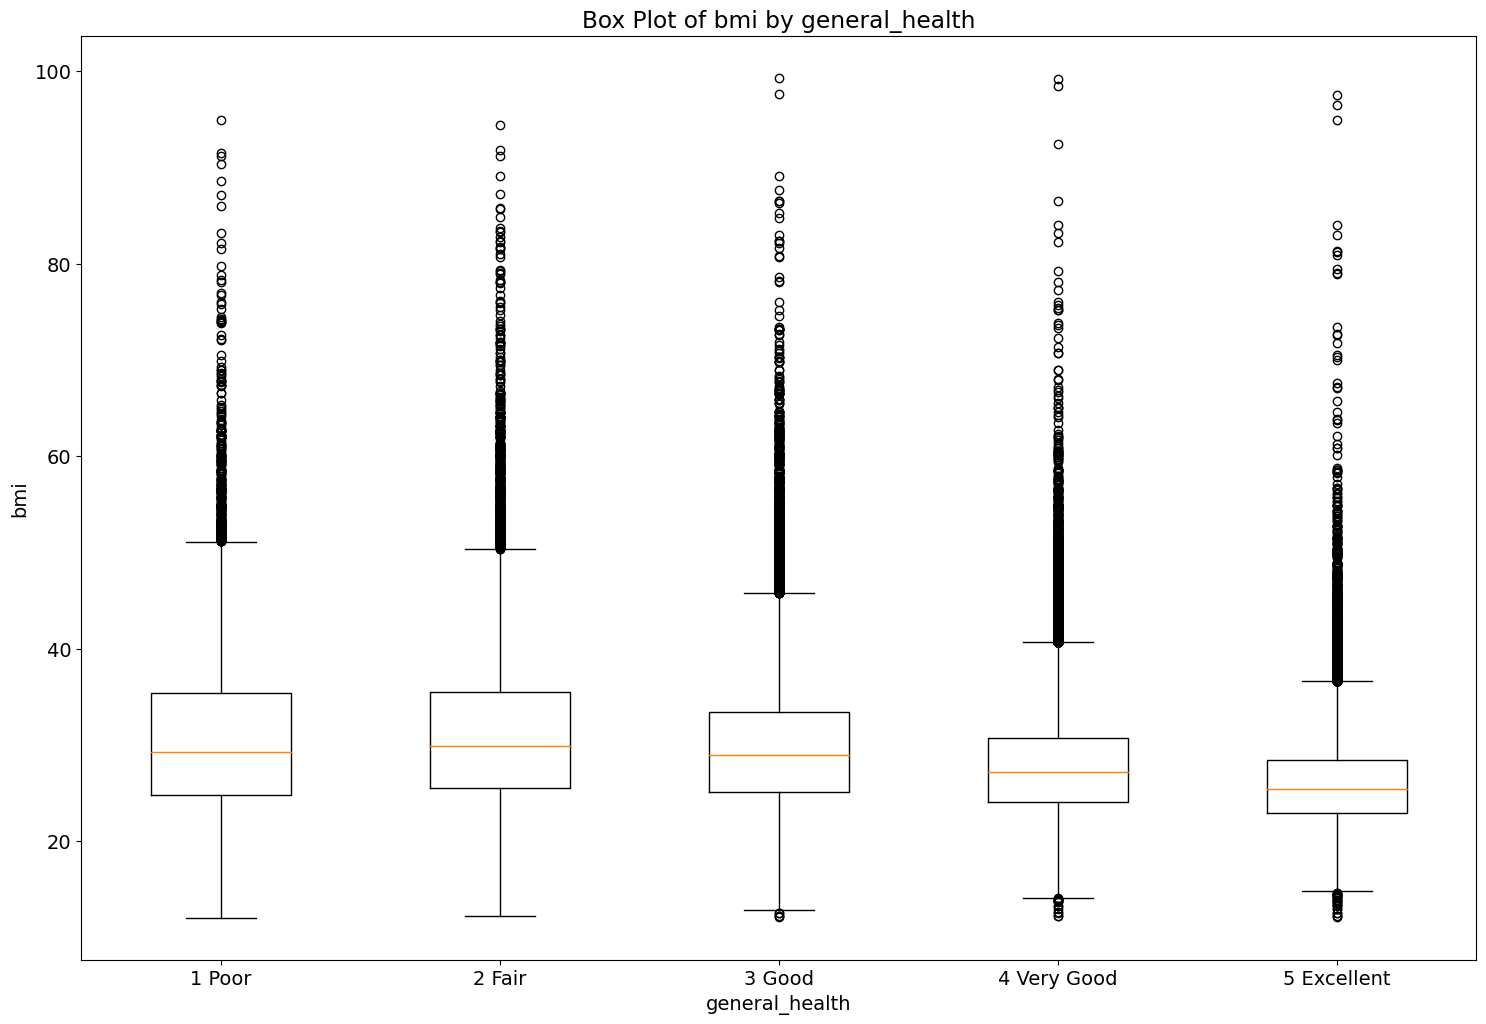

ANOVA and Tukeys HSD of alcohol_consumption by general_health
ANOVA p-value: 0.0
Kruskal-Wallis p-value: 0.0
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
   group1      group2   meandiff p-adj lower  upper  reject
-----------------------------------------------------------
     1 Poor      2 Fair   0.6812   0.0 0.4419 0.9205   True
     1 Poor      3 Good   1.8866   0.0 1.6661 2.1072   True
     1 Poor 4 Very Good   3.1489   0.0   2.93 3.3679   True
     1 Poor 5 Excellent   3.3846   0.0 3.1559 3.6132   True
     2 Fair      3 Good   1.2054   0.0 1.0679  1.343   True
     2 Fair 4 Very Good   2.4677   0.0 2.3327 2.6027   True
     2 Fair 5 Excellent   2.7034   0.0 2.5531 2.8536   True
     3 Good 4 Very Good   1.2623   0.0 1.1641 1.3604   True
     3 Good 5 Excellent   1.4979   0.0 1.3797 1.6161   True
4 Very Good 5 Excellent   0.2356   0.0 0.1204 0.3508   True
-----------------------------------------------------------


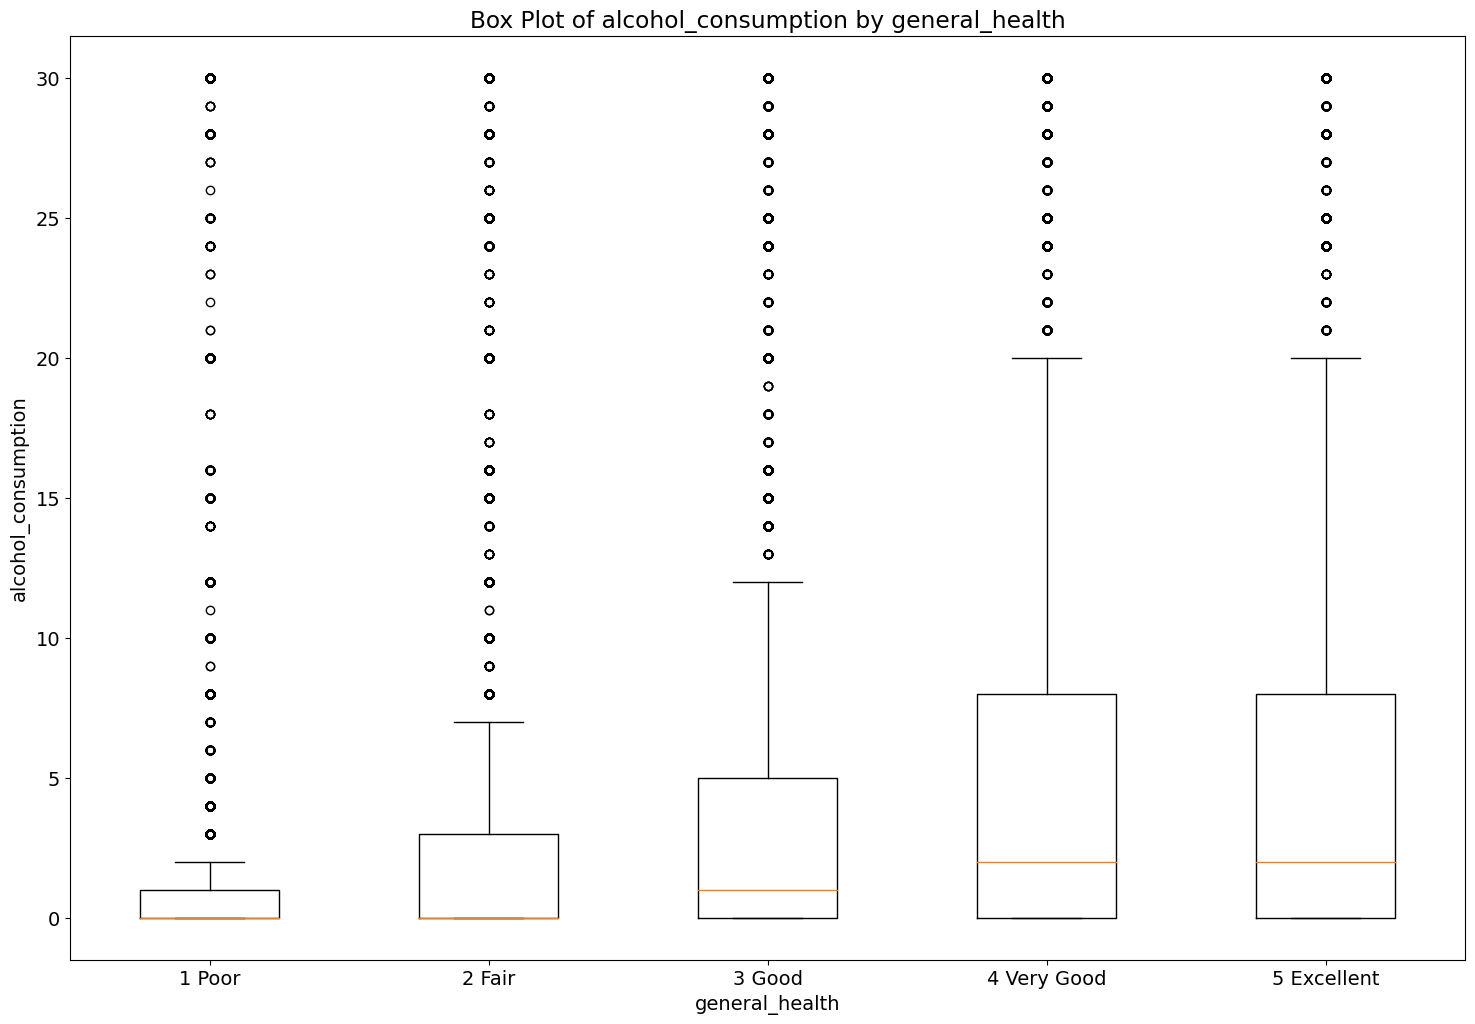

ANOVA and Tukeys HSD of fruit_consumption by general_health
ANOVA p-value: 0.0
Kruskal-Wallis p-value: 0.0
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1      group2   meandiff p-adj   lower  upper  reject
-------------------------------------------------------------
     1 Poor      2 Fair   0.2884 0.8161 -0.4389 1.0158  False
     1 Poor      3 Good   2.2218    0.0  1.5512 2.8923   True
     1 Poor 4 Very Good   5.1747    0.0   4.509 5.8404   True
     1 Poor 5 Excellent   8.1842    0.0   7.489 8.8794   True
     2 Fair      3 Good   1.9334    0.0  1.5151 2.3516   True
     2 Fair 4 Very Good   4.8863    0.0  4.4759 5.2966   True
     2 Fair 5 Excellent   7.8958    0.0  7.4391 8.3524   True
     3 Good 4 Very Good   2.9529    0.0  2.6546 3.2512   True
     3 Good 5 Excellent   5.9624    0.0  5.6031 6.3218   True
4 Very Good 5 Excellent   3.0095    0.0  2.6593 3.3597   True
-------------------------------------------------------------


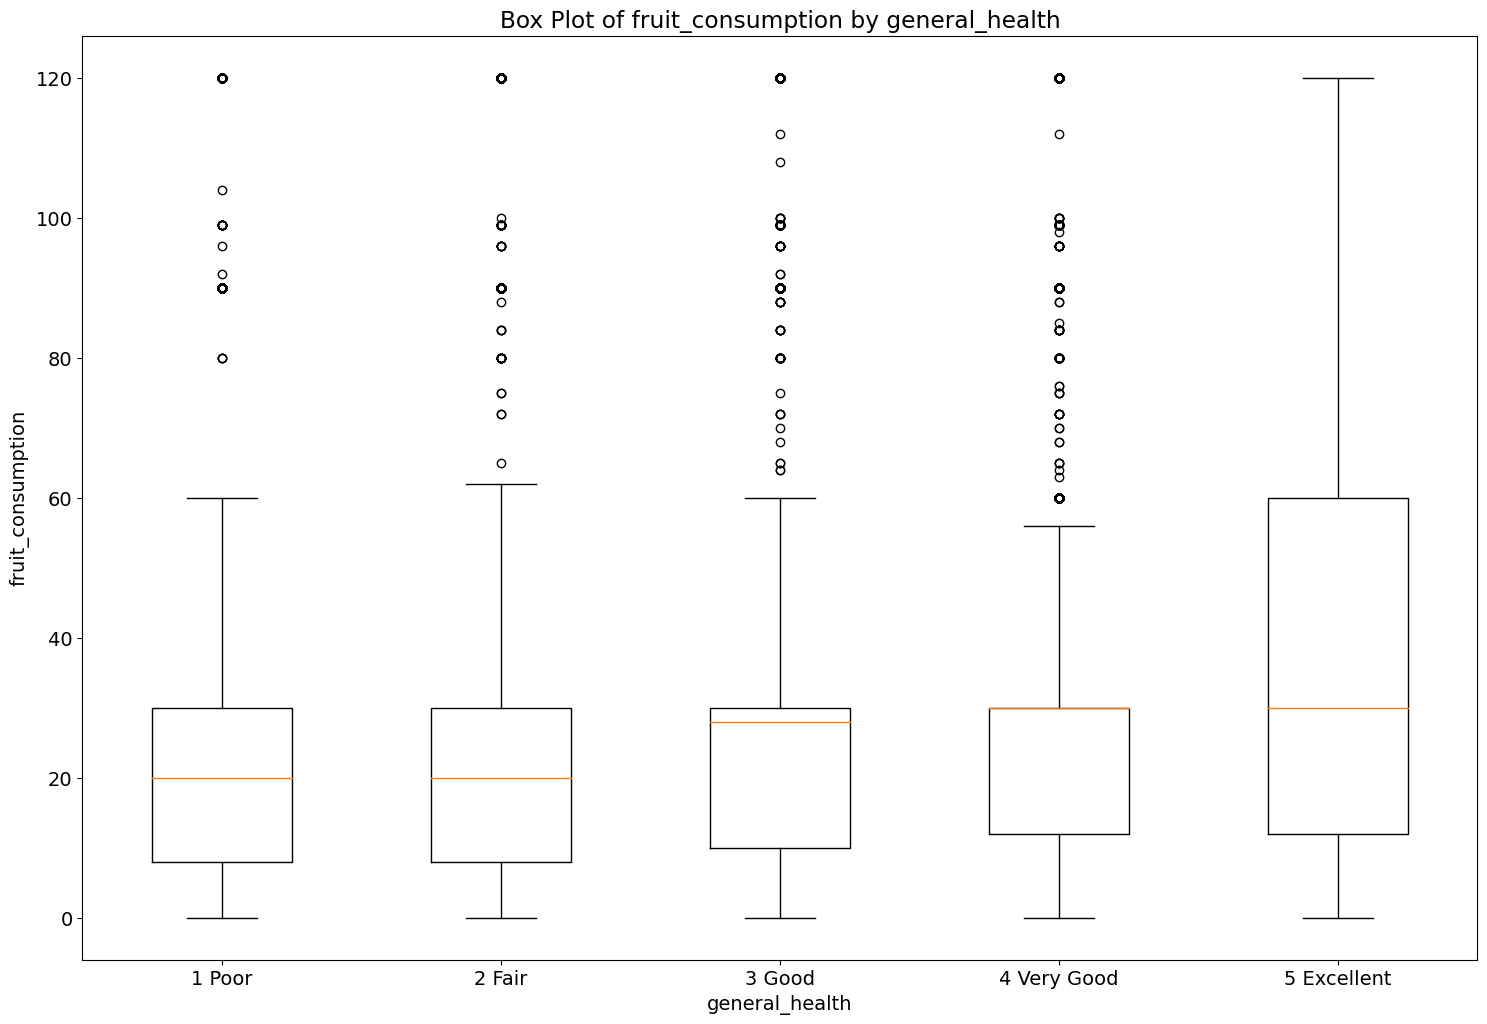

ANOVA and Tukeys HSD of green_vegetables_consumption by general_health
ANOVA p-value: 0.0
Kruskal-Wallis p-value: 0.0
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1      group2   meandiff p-adj  lower  upper  reject
------------------------------------------------------------
     1 Poor      2 Fair   0.6557 0.0004 0.2202 1.0913   True
     1 Poor      3 Good   2.1294    0.0 1.7279  2.531   True
     1 Poor 4 Very Good   3.8404    0.0 3.4418 4.2391   True
     1 Poor 5 Excellent   6.2509    0.0 5.8346 6.6672   True
     2 Fair      3 Good   1.4737    0.0 1.2232 1.7241   True
     2 Fair 4 Very Good   3.1847    0.0 2.9389 3.4304   True
     2 Fair 5 Excellent   5.5951    0.0 5.3216 5.8686   True
     3 Good 4 Very Good    1.711    0.0 1.5323 1.8897   True
     3 Good 5 Excellent   4.1214    0.0 3.9062 4.3366   True
4 Very Good 5 Excellent   2.4104    0.0 2.2007 2.6202   True
------------------------------------------------------------


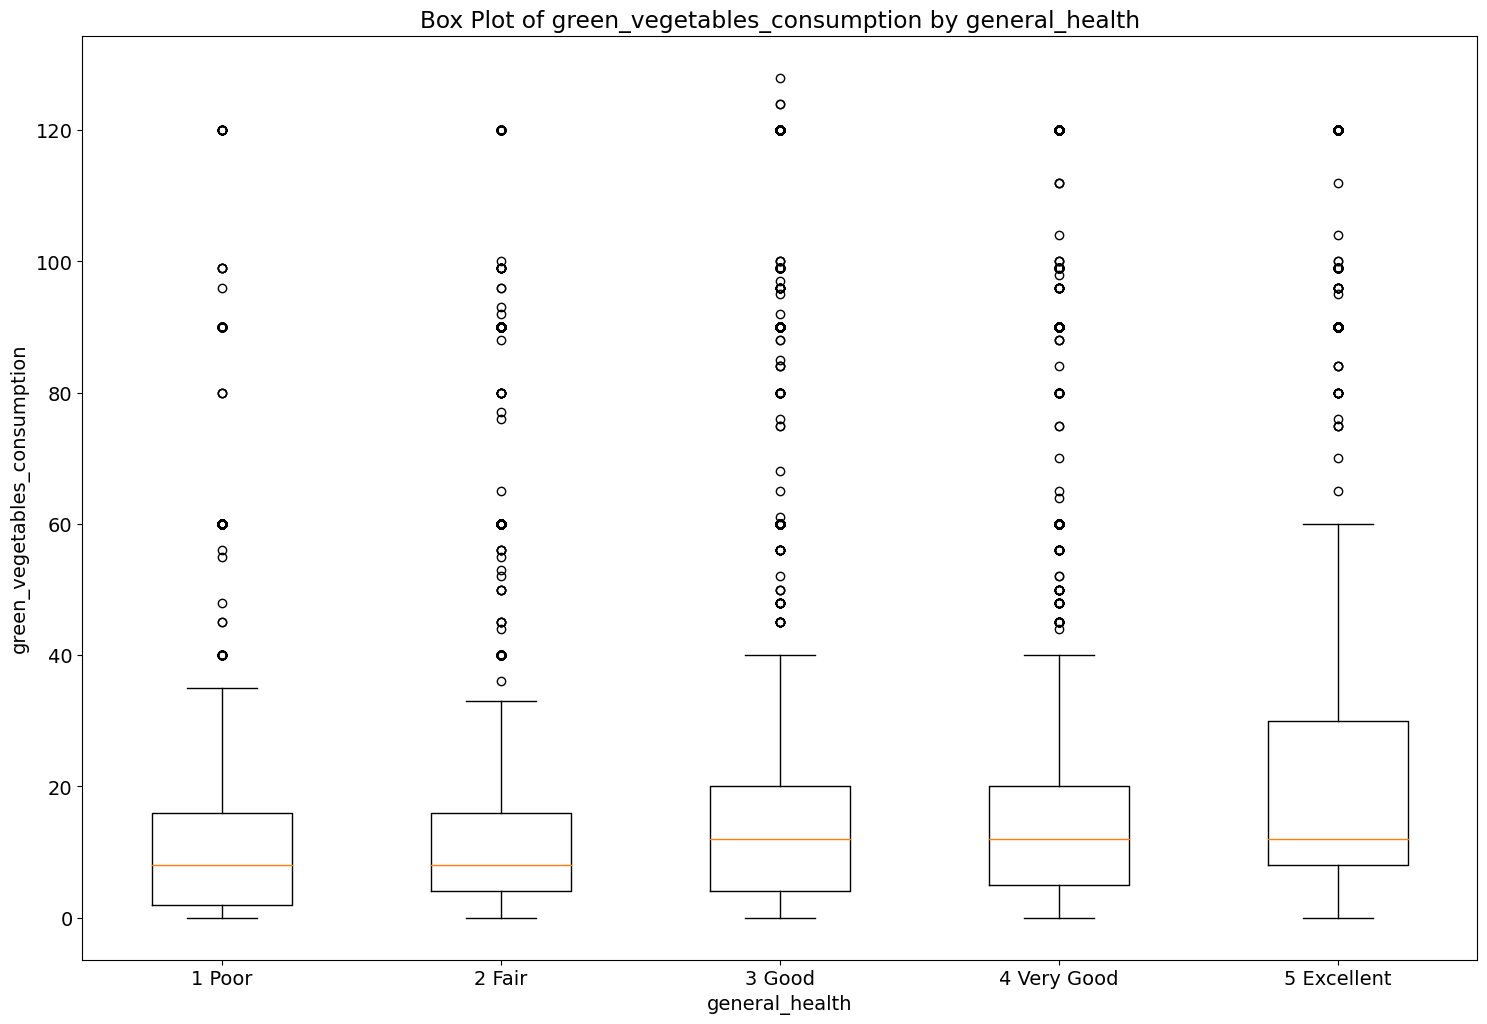

ANOVA and Tukeys HSD of fried_potato_consumption by general_health
ANOVA p-value: 2.1889258475293262e-90
Kruskal-Wallis p-value: 1.2004242368317096e-201
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
     1 Poor      2 Fair   0.1884 0.2479 -0.0638  0.4406  False
     1 Poor      3 Good   0.2011 0.1266 -0.0314  0.4336  False
     1 Poor 4 Very Good  -0.3391 0.0006 -0.5699 -0.1083   True
     1 Poor 5 Excellent  -0.5961    0.0 -0.8371 -0.3551   True
     2 Fair      3 Good   0.0127 0.9993 -0.1323  0.1577  False
     2 Fair 4 Very Good  -0.5275    0.0 -0.6698 -0.3852   True
     2 Fair 5 Excellent  -0.7845    0.0 -0.9428 -0.6262   True
     3 Good 4 Very Good  -0.5402    0.0 -0.6436 -0.4367   True
     3 Good 5 Excellent  -0.7972    0.0 -0.9218 -0.6726   True
4 Very Good 5 Excellent   -0.257    0.0 -0.3784 -0.1356   True
----------------------------

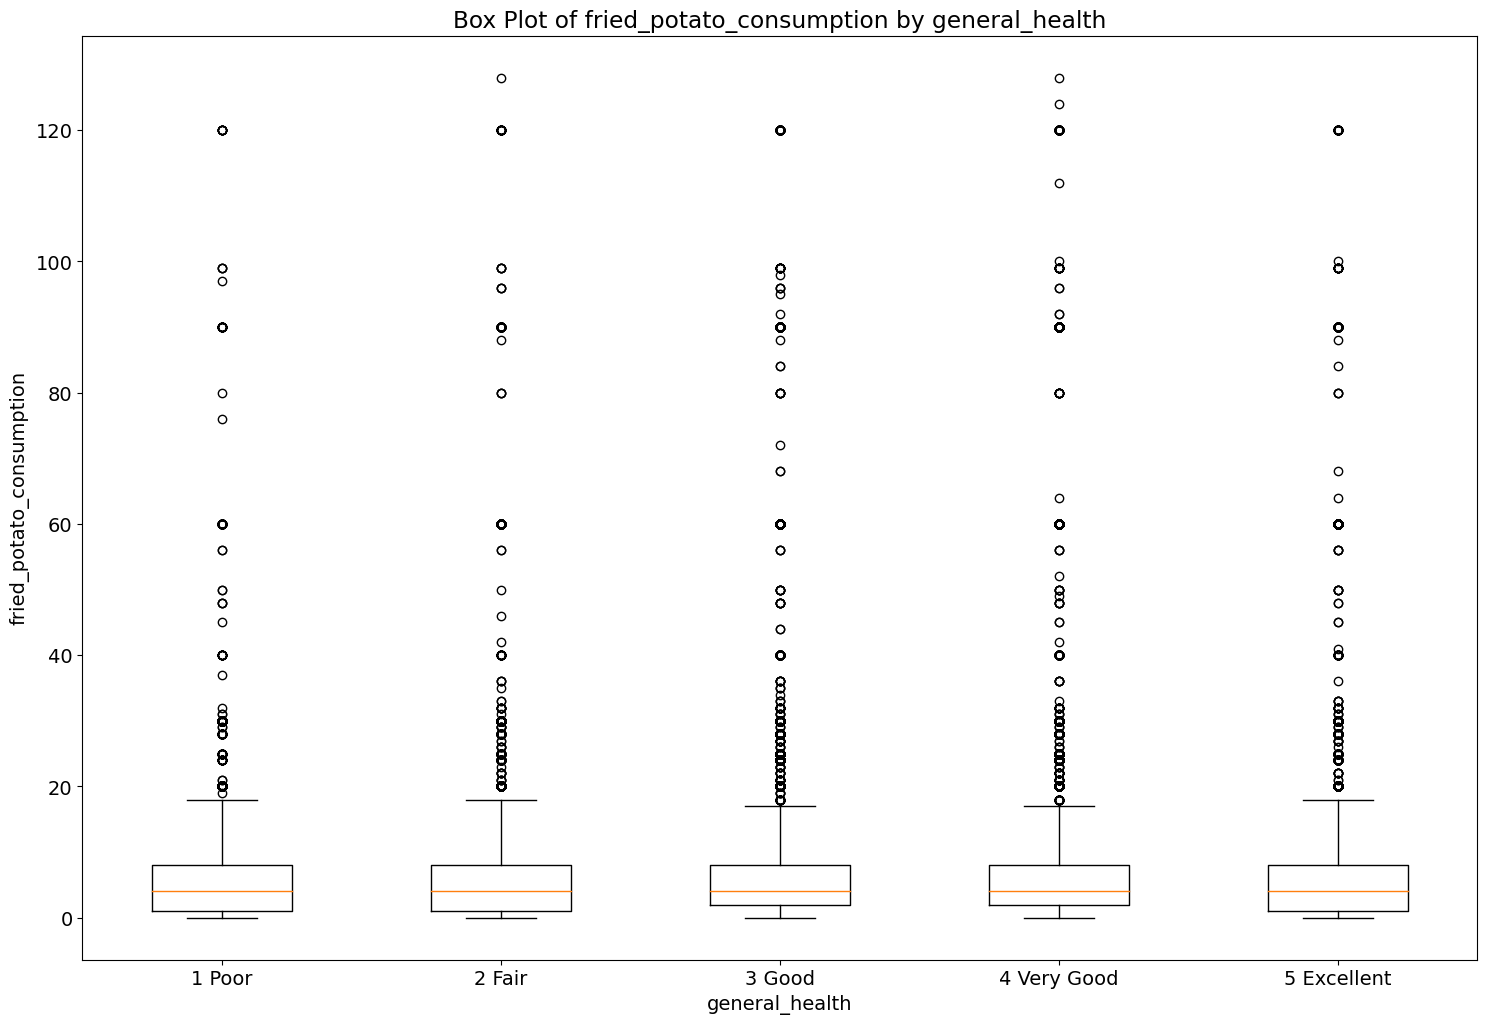

ANOVA and Tukeys HSD of weight_lbs by general_health
ANOVA p-value: 0.0
Kruskal-Wallis p-value: 0.0
      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1      group2   meandiff p-adj   lower    upper   reject
----------------------------------------------------------------
     1 Poor      2 Fair   1.5667 0.0142   0.2089   2.9246   True
     1 Poor      3 Good  -4.3838    0.0  -5.6356  -3.1321   True
     1 Poor 4 Very Good  -15.515    0.0 -16.7577 -14.2723   True
     1 Poor 5 Excellent -25.4506    0.0 -26.7483 -24.1528   True
     2 Fair      3 Good  -5.9506    0.0  -6.7313  -5.1698   True
     2 Fair 4 Very Good -17.0817    0.0 -17.8478 -16.3156   True
     2 Fair 5 Excellent -27.0173    0.0 -27.8698 -26.1648   True
     3 Good 4 Very Good -11.1311    0.0  -11.688 -10.5742   True
     3 Good 5 Excellent -21.0667    0.0 -21.7376 -20.3959   True
4 Very Good 5 Excellent  -9.9356    0.0 -10.5893  -9.2819   True
-------------------------------------------------------

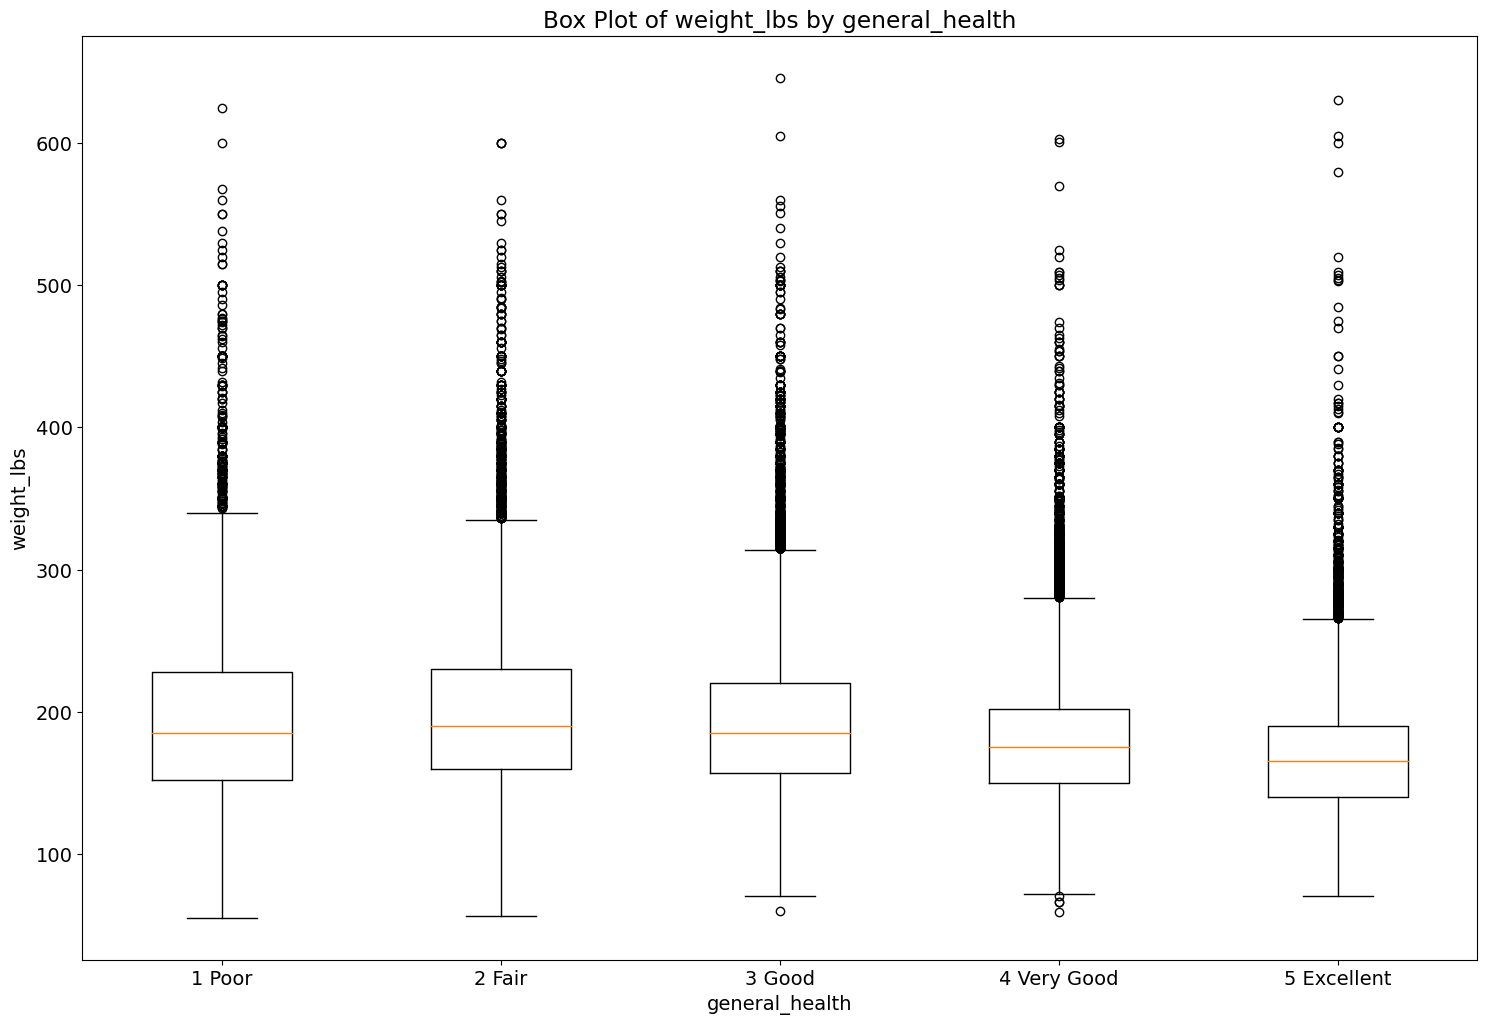

ANOVA and Tukeys HSD of height_feet by general_health
ANOVA p-value: 7.162988415968436e-308
Kruskal-Wallis p-value: 5.0144732516887496e-279
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1      group2   meandiff p-adj   lower  upper  reject
-------------------------------------------------------------
     1 Poor      2 Fair    0.002 0.9848 -0.0083 0.0122  False
     1 Poor      3 Good   0.0342    0.0  0.0247 0.0436   True
     1 Poor 4 Very Good   0.0577    0.0  0.0483  0.067   True
     1 Poor 5 Excellent   0.0767    0.0  0.0669 0.0865   True
     2 Fair      3 Good   0.0322    0.0  0.0263 0.0381   True
     2 Fair 4 Very Good   0.0557    0.0  0.0499 0.0615   True
     2 Fair 5 Excellent   0.0747    0.0  0.0682 0.0811   True
     3 Good 4 Very Good   0.0235    0.0  0.0193 0.0277   True
     3 Good 5 Excellent   0.0425    0.0  0.0374 0.0476   True
4 Very Good 5 Excellent    0.019    0.0  0.0141 0.0239   True
------------------------------------------------------

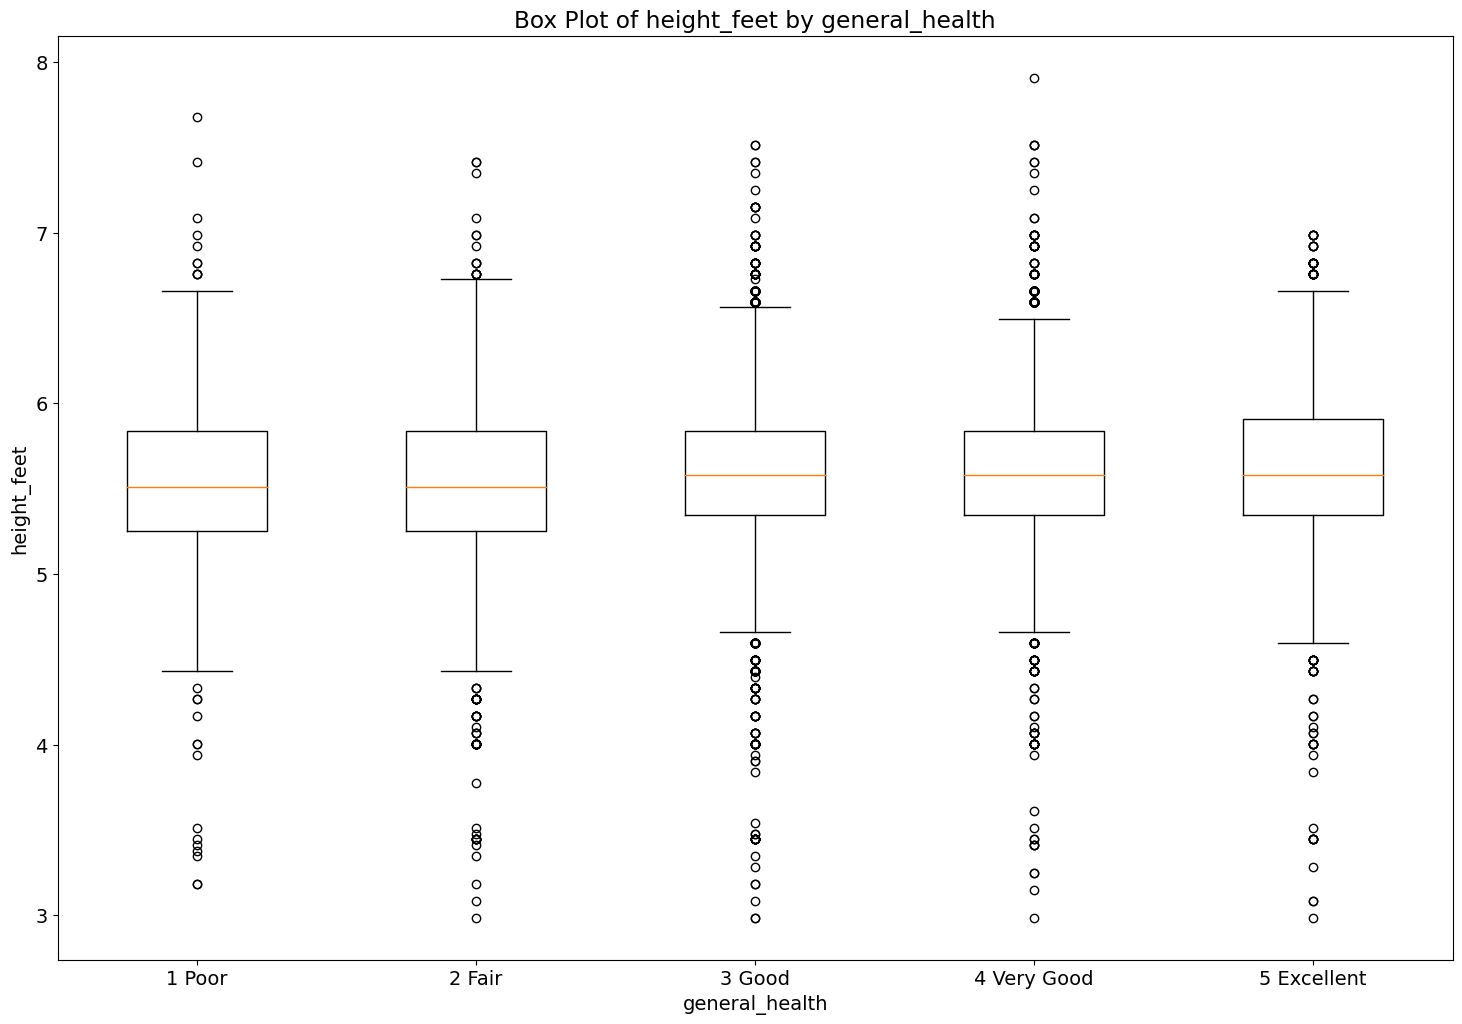

In [44]:
for numerical_column in numerical_columns:
    box_plot(column1, numerical_column)

## Building a Machine Learning Model to Explain 'general-health'

In [32]:
print(string_columns)
print()
print(numerical_columns)

['general_health', 'checkup', 'exercise', 'heart_disease', 'skin_cancer', 'other_cancer', 'depression', 'diabetes', 'arthritis', 'sex', 'age_category', 'smoking_history']

['bmi', 'alcohol_consumption', 'fruit_consumption', 'green_vegetables_consumption', 'fried_potato_consumption', 'weight_lbs', 'height_feet']


In [33]:
cdrpd_encoded_strings = cdrpd.copy()
cdrpd_encoded_strings

,general_health,checkup,exercise,heart_disease,skin_cancer,other_cancer,depression,diabetes,arthritis,sex,age_category,bmi,smoking_history,alcohol_consumption,fruit_consumption,green_vegetables_consumption,fried_potato_consumption,row_number,weight_lbs,height_feet
0,1 Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,14.5400,Yes,0.0000,30.0000,16.0000,12.0000,1,72.0029,4.9213
263218,1 Poor,Within the past year,Yes,No,No,No,No,No,No,Male,45-49,23.9200,No,0.0000,0.0000,4.0000,0.0000,263219,161.9955,5.7415
69169,1 Poor,Within the past year,No,No,No,No,No,No,No,Male,30-34,30.8500,Yes,0.0000,0.0000,8.0000,16.0000,69170,214.9945,5.8399
263245,1 Poor,Within the past year,Yes,Yes,Yes,No,No,No,Yes,Male,75-79,37.1200,No,0.0000,30.0000,4.0000,8.0000,263246,230.0080,5.5118
69130,1 Poor,Within the past year,Yes,No,No,No,Yes,Yes,Yes,Female,45-49,24.2100,No,0.0000,90.0000,0.0000,0.0000,69131,150.0023,5.5118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101068,5 Excellent,Within the past 2 years,Yes,No,No,No,Yes,No,Yes,Male,45-49,25.0900,Yes,0.0000,90.0000,90.0000,3.0000,101069,184.9897,6.0039
101069,5 Excellent,Within the past year,No,Yes,No,No,Yes,No,No,Female,45-49,29.1800,Yes,0.0000,40.0000,30.0000,4.0000,101070,169.9982,5.3478
101075,5 Excellent,Within the past year,Yes,No,No,No,No,No,No,Male,60-64,20.6700,Yes,30.0000,90.0000,20.0000,4.0000,101076,161.0034,6.1680
242420,5 Excellent,Within the past year,Yes,No,No,No,No,No,No,Female,65-69,22.2700,No,4.0000,30.0000,20.0000,12.0000,242421,138.0092,5.5118


In [34]:
cdrpd_encoded_strings_ml = pd.DataFrame(cdrpd_encoded_strings[['general_health', 'exercise', 'sex', 'age_category', 
                                                      'height_feet', 'weight_lbs', 'bmi', 'smoking_history', 
                                                      'alcohol_consumption', 'fruit_consumption', 
                                                      'green_vegetables_consumption', 'fried_potato_consumption']])

In [35]:
cdrpd_encoded_strings_ml = pd.DataFrame(cdrpd_encoded_strings)

In [36]:
cdrpd_encoded_strings_ml

,general_health,checkup,exercise,heart_disease,skin_cancer,other_cancer,depression,diabetes,arthritis,sex,age_category,bmi,smoking_history,alcohol_consumption,fruit_consumption,green_vegetables_consumption,fried_potato_consumption,row_number,weight_lbs,height_feet
0,1 Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,14.5400,Yes,0.0000,30.0000,16.0000,12.0000,1,72.0029,4.9213
263218,1 Poor,Within the past year,Yes,No,No,No,No,No,No,Male,45-49,23.9200,No,0.0000,0.0000,4.0000,0.0000,263219,161.9955,5.7415
69169,1 Poor,Within the past year,No,No,No,No,No,No,No,Male,30-34,30.8500,Yes,0.0000,0.0000,8.0000,16.0000,69170,214.9945,5.8399
263245,1 Poor,Within the past year,Yes,Yes,Yes,No,No,No,Yes,Male,75-79,37.1200,No,0.0000,30.0000,4.0000,8.0000,263246,230.0080,5.5118
69130,1 Poor,Within the past year,Yes,No,No,No,Yes,Yes,Yes,Female,45-49,24.2100,No,0.0000,90.0000,0.0000,0.0000,69131,150.0023,5.5118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101068,5 Excellent,Within the past 2 years,Yes,No,No,No,Yes,No,Yes,Male,45-49,25.0900,Yes,0.0000,90.0000,90.0000,3.0000,101069,184.9897,6.0039
101069,5 Excellent,Within the past year,No,Yes,No,No,Yes,No,No,Female,45-49,29.1800,Yes,0.0000,40.0000,30.0000,4.0000,101070,169.9982,5.3478
101075,5 Excellent,Within the past year,Yes,No,No,No,No,No,No,Male,60-64,20.6700,Yes,30.0000,90.0000,20.0000,4.0000,101076,161.0034,6.1680
242420,5 Excellent,Within the past year,Yes,No,No,No,No,No,No,Female,65-69,22.2700,No,4.0000,30.0000,20.0000,12.0000,242421,138.0092,5.5118


In [37]:
string_columns_ml = cdrpd_encoded_strings_ml.select_dtypes(include='object').columns.tolist()
print(f'There are {len(string_columns_ml)} string variables in the data set')
print(string_columns_ml)
print()
numerical_columns_ml = cdrpd_encoded_strings_ml.select_dtypes(include='float').columns.tolist()
print(f'There are {len(numerical_columns_ml)} numerical variables in the data set')
print(numerical_columns_ml)

There are 12 string variables in the data set
['general_health', 'checkup', 'exercise', 'heart_disease', 'skin_cancer', 'other_cancer', 'depression', 'diabetes', 'arthritis', 'sex', 'age_category', 'smoking_history']

There are 7 numerical variables in the data set
['bmi', 'alcohol_consumption', 'fruit_consumption', 'green_vegetables_consumption', 'fried_potato_consumption', 'weight_lbs', 'height_feet']


In [38]:
from sklearn.preprocessing import LabelEncoder

# Create a dictionary to store the mappings
encoded_mappings = {}

# Initialize label encoders for each column
label_encoders = {column: LabelEncoder() for column in string_columns_ml}

# Label encode categorical columns and store the mappings
for column, encoder in label_encoders.items():
    encoded_values = encoder.fit_transform(cdrpd_encoded_strings_ml[column])
    unique_values = list(set(encoded_values))  # Get unique encoded values
    encoded_mappings[column] = dict(zip(encoder.classes_, unique_values))
    
    # Use .loc to update the DataFrame
    cdrpd_encoded_strings_ml.loc[:, column] = encoded_values

# Print the mappings
for column, mapping in encoded_mappings.items():
    print(f"Mapping for {column}: {mapping}")

Mapping for general_health: {'1 Poor': 0, '2 Fair': 1, '3 Good': 2, '4 Very Good': 3, '5 Excellent': 4}
Mapping for checkup: {'5 or more years ago': 0, 'Never': 1, 'Within the past 2 years': 2, 'Within the past 5 years': 3, 'Within the past year': 4}
Mapping for exercise: {'No': 0, 'Yes': 1}
Mapping for heart_disease: {'No': 0, 'Yes': 1}
Mapping for skin_cancer: {'No': 0, 'Yes': 1}
Mapping for other_cancer: {'No': 0, 'Yes': 1}
Mapping for depression: {'No': 0, 'Yes': 1}
Mapping for diabetes: {'No': 0, 'No, pre-diabetes or borderline diabetes': 1, 'Yes': 2, 'Yes, but female told only during pregnancy': 3}
Mapping for arthritis: {'No': 0, 'Yes': 1}
Mapping for sex: {'Female': 0, 'Male': 1}
Mapping for age_category: {'18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4, '45-49': 5, '50-54': 6, '55-59': 7, '60-64': 8, '65-69': 9, '70-74': 10, '75-79': 11, '80+': 12}
Mapping for smoking_history: {'No': 0, 'Yes': 1}


In [39]:
cdrpd_encoded_strings_ml

,general_health,checkup,exercise,heart_disease,skin_cancer,other_cancer,depression,diabetes,arthritis,sex,age_category,bmi,smoking_history,alcohol_consumption,fruit_consumption,green_vegetables_consumption,fried_potato_consumption,row_number,weight_lbs,height_feet
0,0,2,0,0,0,0,0,0,1,0,10,14.5400,1,0.0000,30.0000,16.0000,12.0000,1,72.0029,4.9213
263218,0,4,1,0,0,0,0,0,0,1,5,23.9200,0,0.0000,0.0000,4.0000,0.0000,263219,161.9955,5.7415
69169,0,4,0,0,0,0,0,0,0,1,2,30.8500,1,0.0000,0.0000,8.0000,16.0000,69170,214.9945,5.8399
263245,0,4,1,1,1,0,0,0,1,1,11,37.1200,0,0.0000,30.0000,4.0000,8.0000,263246,230.0080,5.5118
69130,0,4,1,0,0,0,1,2,1,0,5,24.2100,0,0.0000,90.0000,0.0000,0.0000,69131,150.0023,5.5118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101068,4,2,1,0,0,0,1,0,1,1,5,25.0900,1,0.0000,90.0000,90.0000,3.0000,101069,184.9897,6.0039
101069,4,4,0,1,0,0,1,0,0,0,5,29.1800,1,0.0000,40.0000,30.0000,4.0000,101070,169.9982,5.3478
101075,4,4,1,0,0,0,0,0,0,1,8,20.6700,1,30.0000,90.0000,20.0000,4.0000,101076,161.0034,6.1680
242420,4,4,1,0,0,0,0,0,0,0,9,22.2700,0,4.0000,30.0000,20.0000,12.0000,242421,138.0092,5.5118


In [41]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

numerical_columns_ml = ['height_feet', 'weight_lbs', 'bmi', 'alcohol_consumption', 'fruit_consumption', 
                        'green_vegetables_consumption', 'fried_potato_consumption']
string_columns_ml = ['exercise', 'sex', 'age_category', 'smoking_history']
target_columns_ml = ['general_health', 'heart_disease', 'skin_cancer', 'other_cancer', 
                     'depression', 'diabetes', 'arthritis']

def ml_model(target):
    
    # Standardize numerical variables
    scaler = StandardScaler()
    cdrpd_encoded_strings_ml[numerical_columns_ml] = scaler.fit_transform(cdrpd_encoded_strings_ml[numerical_columns_ml])

    # Split data into features and labels
    X_numerical = cdrpd_encoded_strings_ml[numerical_columns_ml]
    X_categorical = pd.get_dummies(cdrpd_encoded_strings_ml[string_columns_ml], columns=string_columns_ml)
    X = pd.concat([X_numerical, X_categorical], axis=1)
    
    y = cdrpd_encoded_strings_ml[target]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build the neural network model
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1],)),  # Input layer

        # Add your hidden layers here
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),

        tf.keras.layers.Dense(6, activation='softmax')  # Output layer with appropriate number of classes
    ])
    
    print(f'Testing ML model for {target} as target variable')
    
    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    print("Accuracy:", accuracy)

    # Make predictions
    predictions = model.predict(X_test)
    
    print()

In [42]:
for target_column in target_columns_ml:    
    ml_model(target_column)

Testing ML model for general_health as target variable
Epoch 1/10
7722/7722 [==============================] - 8s 1ms/step - loss: 1.3068 - accuracy: 0.4068 - val_loss: 1.2952 - val_accuracy: 0.4116
Epoch 2/10
7722/7722 [==============================] - 8s 1ms/step - loss: 1.2959 - accuracy: 0.4104 - val_loss: 1.2945 - val_accuracy: 0.4099
Epoch 3/10
7722/7722 [==============================] - 8s 1ms/step - loss: 1.2938 - accuracy: 0.4111 - val_loss: 1.2941 - val_accuracy: 0.4094
Epoch 4/10
7722/7722 [==============================] - 8s 1ms/step - loss: 1.2926 - accuracy: 0.4115 - val_loss: 1.2982 - val_accuracy: 0.4084
Epoch 5/10
7722/7722 [==============================] - 8s 1ms/step - loss: 1.2918 - accuracy: 0.4124 - val_loss: 1.2935 - val_accuracy: 0.4100
Epoch 6/10
7722/7722 [==============================] - 8s 1ms/step - loss: 1.2910 - accuracy: 0.4124 - val_loss: 1.2926 - val_accuracy: 0.4094
Epoch 7/10
7722/7722 [==============================] - 8s 1ms/step - loss: 1.290

1931/1931 [==============================] - 1s 715us/step - loss: 0.4585 - accuracy: 0.8053
Accuracy: 0.8053131699562073
1931/1931 [==============================] - 1s 598us/step

Testing ML model for diabetes as target variable
Epoch 1/10
7722/7722 [==============================] - 8s 1ms/step - loss: 0.4717 - accuracy: 0.8392 - val_loss: 0.4736 - val_accuracy: 0.8382
Epoch 2/10
7722/7722 [==============================] - 8s 1ms/step - loss: 0.4636 - accuracy: 0.8400 - val_loss: 0.4690 - val_accuracy: 0.8383
Epoch 3/10
7722/7722 [==============================] - 8s 1ms/step - loss: 0.4624 - accuracy: 0.8399 - val_loss: 0.4675 - val_accuracy: 0.8383
Epoch 4/10
7722/7722 [==============================] - 8s 1ms/step - loss: 0.4618 - accuracy: 0.8400 - val_loss: 0.4730 - val_accuracy: 0.8377
Epoch 5/10
7722/7722 [==============================] - 8s 1ms/step - loss: 0.4613 - accuracy: 0.8400 - val_loss: 0.4666 - val_accuracy: 0.8385
Epoch 6/10
7722/7722 [===========================

# Todo List
* Find a way to iterate through target variables
* 